In [1]:
# First, import the standard libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob,pathlib

# for some monitors, this makes the figures crisp
%config InlineBackend.figure_format='retina'

## CCLE Data
We have prepared some simplified dataframes based on the [Cancer Cell Line Encyclopedia](https://sites.broadinstitute.org/ccle/) (CCLE) database from the Broad Institute. They are broken into a generic cell line metadata file, and a RNAseq file with RPKM data.  
<img src="https://sites.broadinstitute.org/files/files/ccle/files/ccle_4.jpg" alt="CCLE" align="left" width="500" height="300">



### Read in data files with Pandas 
Have a look at the files we have prepared for you. The ```glob``` library in Python provides a simple way to search for files and directories that match a specified pattern. Use an asterisk * to invoke a wild card

In [2]:
glob.glob('data/*')

['data/CCLE_rpkm_metadata_forcourse.csv.gz', 'data/CCLE_rpkm_forcourse.csv.gz']

In [3]:
# read in the metadata file
meta = pd.read_csv('data/CCLE_rpkm_metadata_forcourse.csv.gz', index_col=0)
meta[:3]

depMapID   Pathology            Site_Primary  \
Cell_Line                                                                       
2313287_STOMACH                ACH-000948     primary                 stomach   
42MGBA_CENTRAL_NERVOUS_SYSTEM  ACH-000323     primary  central_nervous_system   
59M_OVARY                      ACH-000520  metastasis                   ovary   

                              Site_Subtype1  Histology  Gender   Age Race  \
Cell_Line                                                                   
2313287_STOMACH                          NS  carcinoma    male  72.0  NaN   
42MGBA_CENTRAL_NERVOUS_SYSTEM         brain     glioma    male  63.0  NaN   
59M_OVARY                                NS  carcinoma  female   NaN  NaN   

                              inferred_ethnicity            Disease  \
Cell_Line                                                             
2313287_STOMACH                        Caucasian                NaN   
42MGBA_CENTRAL_NERVOUS_SYSTEM          Caucasian       Brain Cancer   
59M_OVARY                              Caucasian  ovarian_carcinoma   

                               Doubling.Time.Calculated.hrs     type  \
Cell_Line                                                              
2313287_STOMACH                                        97.6  stomach   
42MGBA_CENTRAL_NERVOUS_SYSTEM                          82.6   glioma   
59M_OVARY                                               NaN    ovary   

                              type_refined PATHOLOGIST_ANNOTATION     mutRate  
Cell_Line                                                                      
2313287_STOMACH                    stomach      Gastric:Carcinoma  521.355253  
42MGBA_CENTRAL_NERVOUS_SYSTEM       glioma   CNS:Glioma_HighGrade  107.050880  
59M_OVARY                            ovary        Ovary:Carcinoma  110.612331

In [4]:
# Get a quick summary of what the columns of the dataframe contain
meta.info()


<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 2313287_STOMACH to ZR7530_BREAST
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   depMapID                      804 non-null    object 
 1   Pathology                     775 non-null    object 
 2   Site_Primary                  804 non-null    object 
 3   Site_Subtype1                 804 non-null    object 
 4   Histology                     804 non-null    object 
 5   Gender                        713 non-null    object 
 6   Age                           619 non-null    float64
 7   Race                          443 non-null    object 
 8   inferred_ethnicity            801 non-null    object 
 9   Disease                       266 non-null    object 
 10  Doubling.Time.Calculated.hrs  440 non-null    float64
 11  type                          802 non-null    object 
 12  type_refined                  804 non-null   

In [5]:
# Numerical columns can be summarized with the .describe() method
meta.describe()

Age  Doubling.Time.Calculated.hrs      mutRate
count  619.000000                    440.000000   785.000000
mean    50.320005                     98.291641   200.419679
std     18.264266                     87.461201   248.548016
min      0.250000                     20.900000    53.870752
25%     41.000000                     49.875000   104.775734
50%     54.000000                     72.250000   136.470378
75%     64.000000                    113.300000   181.189653
max     92.000000                    979.000000  3119.618365


The ```pd.crosstab()``` function creates a frequency table (or contingency table) that summarizes the relationship between two or more categorical variables. It's particularly useful for analyzing count-based data across categories

In [6]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'Hashable' = 'All', dropna: 'bool' = True, normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.
    
    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequen

In [7]:
pd.crosstab(meta['Site_Primary'],meta['Race'])

Race                                african  african_american  \
Site_Primary                                                    
breast                                    0                 9   
central_nervous_system                    0                 1   
endometrium                               0                 0   
haematopoietic_and_lymphoid_tissue        2                 3   
kidney                                    0                 0   
large_intestine                           0                 0   
lung                                      0                10   
ovary                                     0                 1   
pancreas                                  0                 0   
skin                                      0                 0   
stomach                                   0                 0   
upper_aerodigestive_tract                 0                 0   

Race                                american_indian  asian  caucasian  \
Site_Primary                                                            
breast                                            0      3         35   
central_nervous_system                            0      7         12   
endometrium                                       0     15          6   
haematopoietic_and_lymphoid_tissue                0     21         32   
kidney                                            0      7          5   
large_intestine                                   1     13         25   
lung                                              0     12         99   
ovary                                             0     13          8   
pancreas                                          0     13         18   
skin                                              0      0         26   
stomach                                           0     23          2   
upper_aerodigestive_tract                         0      9         10   

Race                                east_indian  north_african  
Site_Primary                                                    
breast                                        1              0  
central_nervous_system                        0              0  
endometrium                                   0              0  
haematopoietic_and_lymphoid_tissue            0              1  
kidney                                        0              0  
large_intestine                               0              0  
lung                                          0              0  
ovary                                         0              0  
pancreas                                      0              0  
skin                                          0              0  
stomach                                       0              0  
upper_aerodigestive_tract                     0              0

### Read in gene expression data

In [8]:
rpkm = pd.read_csv('data/CCLE_rpkm_forcourse.csv.gz', index_col=0)
rpkm[:3]

WASH7P  MTND1P23   MTND2P28  hsa-mir-6723  \
Cell_Line                                                                   
2313287_STOMACH                4.26104  0.839617  115.65700       24.8860   
42MGBA_CENTRAL_NERVOUS_SYSTEM  3.99494  1.376160    4.86524        9.4919   
59M_OVARY                      2.56941  4.081810   70.18380       34.3897   

                               RP5-857K21.7  MTATP8P1  MTATP6P1  \
Cell_Line                                                         
2313287_STOMACH                      8.3378  13.06640  241.8750   
42MGBA_CENTRAL_NERVOUS_SYSTEM       17.7806   5.61414   15.6446   
59M_OVARY                           26.3026   8.09055  575.6590   

                               RP5-857K21.11     SAMD11     NOC2L  ...  \
Cell_Line                                                          ...   
2313287_STOMACH                      6.39347   0.472467   47.5542  ...   
42MGBA_CENTRAL_NERVOUS_SYSTEM        9.96201  11.776600  106.4350  ...   
59M_OVARY                           20.21690   3.678380   76.9264  ...   

                               MT-ATP8   MT-ATP6   MT-CO3   MT-ND3  MT-ND4L  \
Cell_Line                                                                     
2313287_STOMACH                9810.56  10612.90  8955.51  1288.33  3914.86   
42MGBA_CENTRAL_NERVOUS_SYSTEM  6315.61   6579.52  3711.09  1188.07  2616.58   
59M_OVARY                      7254.03   6886.41  7738.25  1501.63  3520.43   

                                MT-ND4   MT-ND5   MT-ND6     MT-TE   MT-CYB  
Cell_Line                                                                    
2313287_STOMACH                8190.65  1909.74  1974.76   3.06213  3685.24  
42MGBA_CENTRAL_NERVOUS_SYSTEM  4004.12  1158.29  1622.68   2.55038  2215.69  
59M_OVARY                      5364.07  1911.64  1900.10  37.64800  1975.03  

[3 rows x 11417 columns]

Merge the data together with the ```.merge()``` method built into Pandas dataframes

In [9]:
data = meta.merge(rpkm, left_index=True, right_index=True, how='left')
data[:3]

depMapID   Pathology            Site_Primary  \
Cell_Line                                                                       
2313287_STOMACH                ACH-000948     primary                 stomach   
42MGBA_CENTRAL_NERVOUS_SYSTEM  ACH-000323     primary  central_nervous_system   
59M_OVARY                      ACH-000520  metastasis                   ovary   

                              Site_Subtype1  Histology  Gender   Age Race  \
Cell_Line                                                                   
2313287_STOMACH                          NS  carcinoma    male  72.0  NaN   
42MGBA_CENTRAL_NERVOUS_SYSTEM         brain     glioma    male  63.0  NaN   
59M_OVARY                                NS  carcinoma  female   NaN  NaN   

                              inferred_ethnicity            Disease  ...  \
Cell_Line                                                            ...   
2313287_STOMACH                        Caucasian                NaN  ...   
42MGBA_CENTRAL_NERVOUS_SYSTEM          Caucasian       Brain Cancer  ...   
59M_OVARY                              Caucasian  ovarian_carcinoma  ...   

                               MT-ATP8   MT-ATP6   MT-CO3   MT-ND3  MT-ND4L  \
Cell_Line                                                                     
2313287_STOMACH                9810.56  10612.90  8955.51  1288.33  3914.86   
42MGBA_CENTRAL_NERVOUS_SYSTEM  6315.61   6579.52  3711.09  1188.07  2616.58   
59M_OVARY                      7254.03   6886.41  7738.25  1501.63  3520.43   

                                MT-ND4   MT-ND5   MT-ND6     MT-TE   MT-CYB  
Cell_Line                                                                    
2313287_STOMACH                8190.65  1909.74  1974.76   3.06213  3685.24  
42MGBA_CENTRAL_NERVOUS_SYSTEM  4004.12  1158.29  1622.68   2.55038  2215.69  
59M_OVARY                      5364.07  1911.64  1900.10  37.64800  1975.03  

[3 rows x 11432 columns]

In [13]:
meta.select_dtypes('number')

Age  Doubling.Time.Calculated.hrs  \
Cell_Line                                                                    
2313287_STOMACH                         72.0                          97.6   
42MGBA_CENTRAL_NERVOUS_SYSTEM           63.0                          82.6   
59M_OVARY                                NaN                           NaN   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  12.0                          46.6   
769P_KIDNEY                             63.0                          31.5   
...                                      ...                           ...   
YD8_UPPER_AERODIGESTIVE_TRACT           46.0                           NaN   
YH13_CENTRAL_NERVOUS_SYSTEM             40.0                          77.1   
YKG1_CENTRAL_NERVOUS_SYSTEM              NaN                           NaN   
ZR751_BREAST                            63.0                          88.7   
ZR7530_BREAST                           47.0                           NaN   

                                           mutRate  
Cell_Line                                           
2313287_STOMACH                         521.355253  
42MGBA_CENTRAL_NERVOUS_SYSTEM           107.050880  
59M_OVARY                               110.612331  
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE   75.699456  
769P_KIDNEY                             104.273493  
...                                            ...  
YD8_UPPER_AERODIGESTIVE_TRACT           176.583324  
YH13_CENTRAL_NERVOUS_SYSTEM             159.433383  
YKG1_CENTRAL_NERVOUS_SYSTEM             162.475553  
ZR751_BREAST                             65.390119  
ZR7530_BREAST                           175.876541  

[804 rows x 3 columns]

In [37]:
var1 = 'inferred_ethnicity'
var2 = 'Site_Primary'

n1 = len(meta[var1].unique())
n2 = len(meta[var2].unique())


df = pd.crosstab(meta[var1], meta[var2])

if n1 < n2:
    df = df.T
df

inferred_ethnicity                  African_american  Asian  Caucasian
Site_Primary                                                          
breast                                            10      2         45
central_nervous_system                             0     21         43
endometrium                                        0     19          9
haematopoietic_and_lymphoid_tissue                12     51        106
kidney                                             1     12         19
large_intestine                                    1     18         39
lung                                              17     20        143
ovary                                              1     20         26
pancreas                                           1     17         23
skin                                               0      2         54
stomach                                            1     33          3
upper_aerodigestive_tract                          0     13         19

In [36]:
meta['inferred_ethnicity'].isna().sum()

np.int64(3)

In [28]:
meta['Race'] = meta['Race'].fillna('unknown')

In [38]:
keep = ['large_intestine','lung','pancreas','skin']

m2 = meta[meta['Site_Primary'].isin(keep)]
m2['type_refined'].value_counts()

type_refined
lung_NSC           125
colorectal          55
lung_small_cell     50
melanoma            49
pancreas            41
fibroblast_like     14
other                2
Name: count, dtype: int64

In [50]:

cols_to_filter = ['Gender','Age','mutRate']
keep_cols = ['Pathology','Site_Primary','Histology','Gender','Age','inferred_ethnicity','type','type_refined','mutRate']
m2 = meta[meta['Site_Primary'].isin(keep)].copy()
for col in cols_to_filter:
    m2 = m2[~m2[col].isna()]
    
m2 = m2.loc[:,keep_cols]

m2
    


Pathology     Site_Primary           Histology  Gender  \
Cell_Line                                                                      
A101D_SKIN              primary             skin  malignant_melanoma    male   
A2058_SKIN           metastasis             skin  malignant_melanoma    male   
A375_SKIN               primary             skin  malignant_melanoma  female   
A549_LUNG               primary             lung           carcinoma    male   
ABC1_LUNG               primary             lung           carcinoma    male   
...                         ...              ...                 ...     ...   
T84_LARGE_INTESTINE  metastasis  large_intestine           carcinoma    male   
TCCPAN2_PANCREAS        primary         pancreas           carcinoma  female   
WM115_SKIN              primary             skin  malignant_melanoma  female   
WM2664_SKIN          metastasis             skin  malignant_melanoma  female   
YAPC_PANCREAS        metastasis         pancreas           carcinoma    male   

                      Age inferred_ethnicity        type type_refined  \
Cell_Line                                                               
A101D_SKIN           56.0          Caucasian    melanoma     melanoma   
A2058_SKIN           43.0          Caucasian    melanoma     melanoma   
A375_SKIN            54.0          Caucasian    melanoma     melanoma   
A549_LUNG            58.0          Caucasian    lung_NSC     lung_NSC   
ABC1_LUNG            47.0              Asian    lung_NSC     lung_NSC   
...                   ...                ...         ...          ...   
T84_LARGE_INTESTINE  72.0          Caucasian  colorectal   colorectal   
TCCPAN2_PANCREAS     68.0              Asian    pancreas     pancreas   
WM115_SKIN           59.0          Caucasian    melanoma     melanoma   
WM2664_SKIN          58.0          Caucasian    melanoma     melanoma   
YAPC_PANCREAS        43.0              Asian    pancreas     pancreas   

                        mutRate  
Cell_Line                        
A101D_SKIN            78.145129  
A2058_SKIN           164.676892  
A375_SKIN            150.058138  
A549_LUNG            159.491753  
ABC1_LUNG            146.934953  
...                         ...  
T84_LARGE_INTESTINE  101.516333  
TCCPAN2_PANCREAS     181.227373  
WM115_SKIN           135.062129  
WM2664_SKIN          123.352645  
YAPC_PANCREAS        115.525406  

[252 rows x 9 columns]

In [64]:
import scanpy as sc
import sys
sys.path.append('/Users/jpreall/Dropbox/Preall_Lab/Preall/scripts/jpplot/master/')
import jpplot

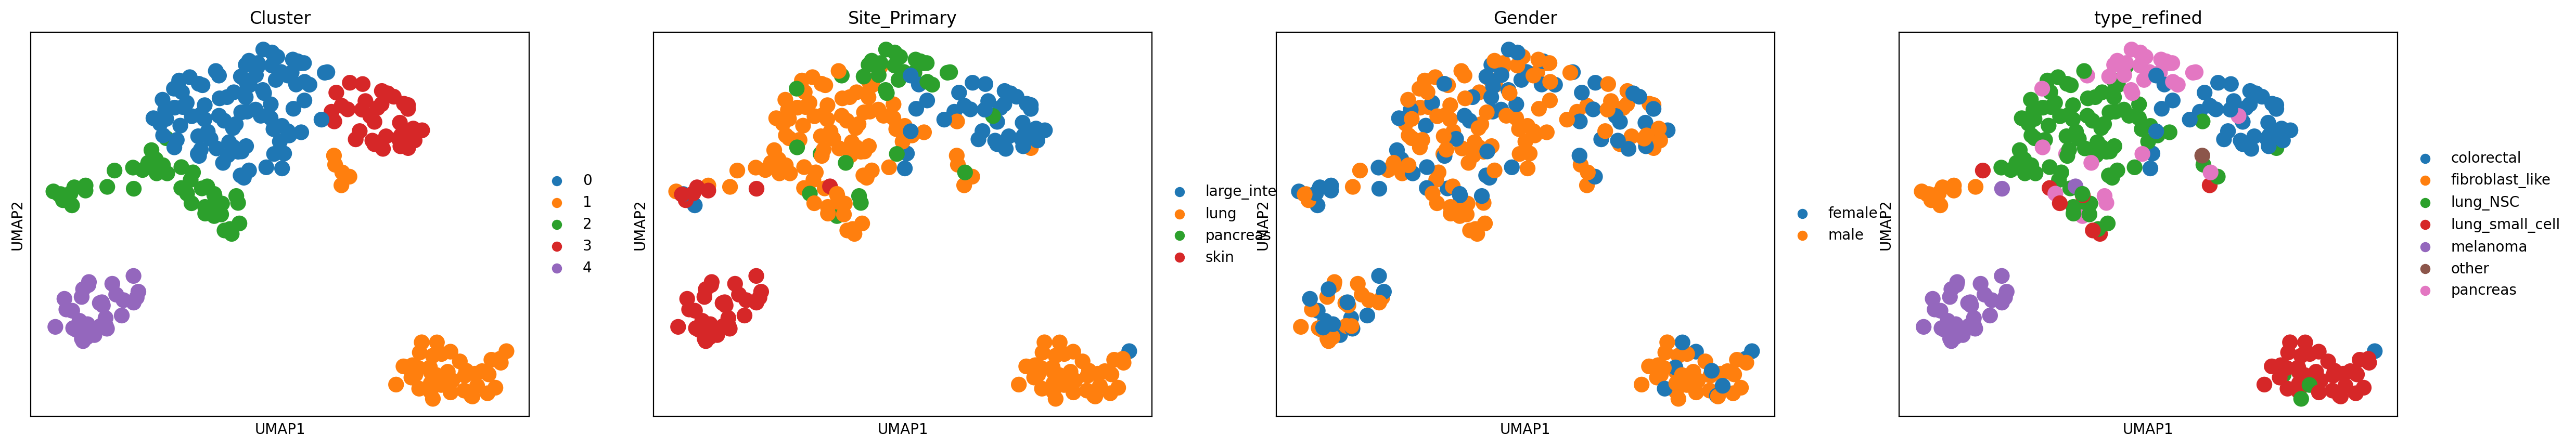

In [72]:
adata = sc.AnnData(rpkm.loc[m2.index])
adata.obs = m2
adata.layers['rpkm'] = adata.X.copy()
sc.pp.log1p(adata)
adata.raw = adata.copy()
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata)
sc.pp.neighbors(adata)

sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='Cluster', resolution=0.5)
sc.pl.umap(adata, color=['Cluster','Site_Primary','Gender','type_refined'])


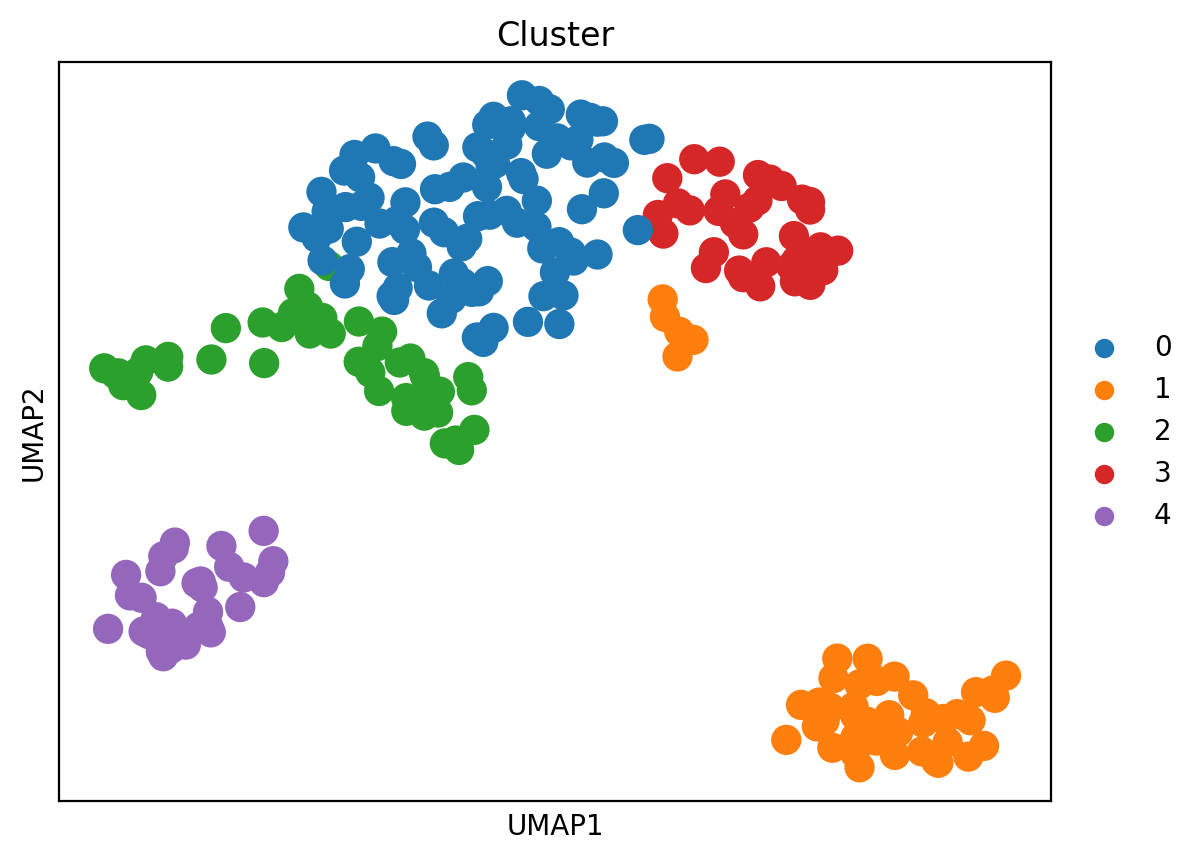

In [70]:
print(adata.obs.columns)

jpplot.markers(adata, groupby='Site_Primary')

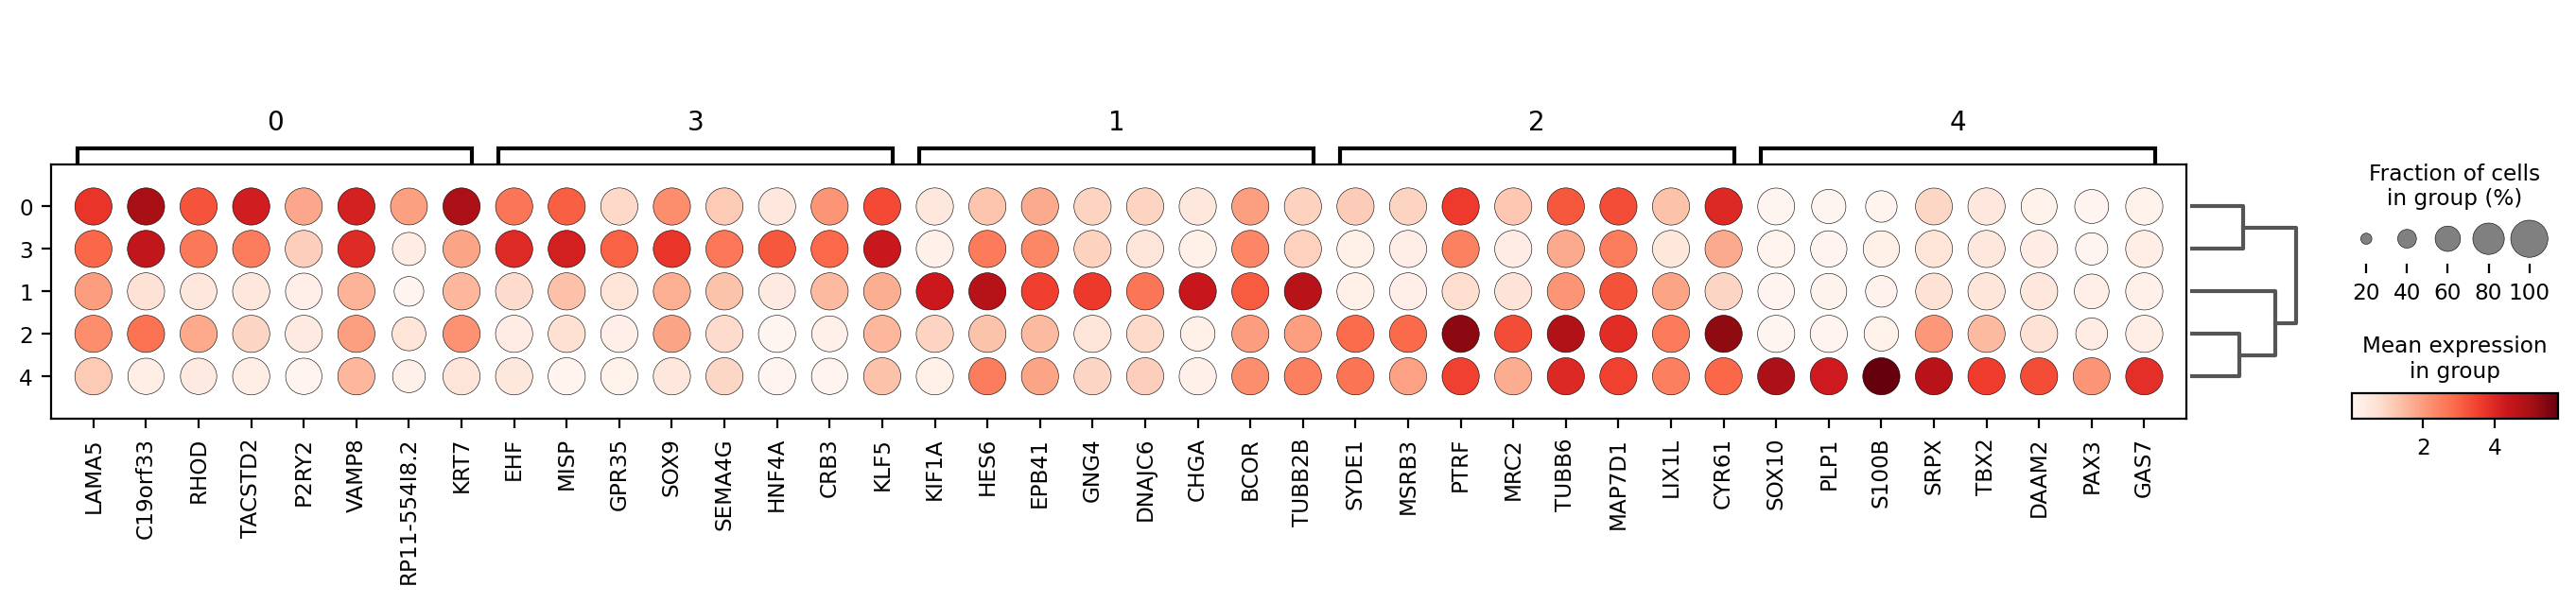

In [73]:
jpplot.markers(adata, groupby='Cluster')

Showing genes with adj_pval < 1e-06


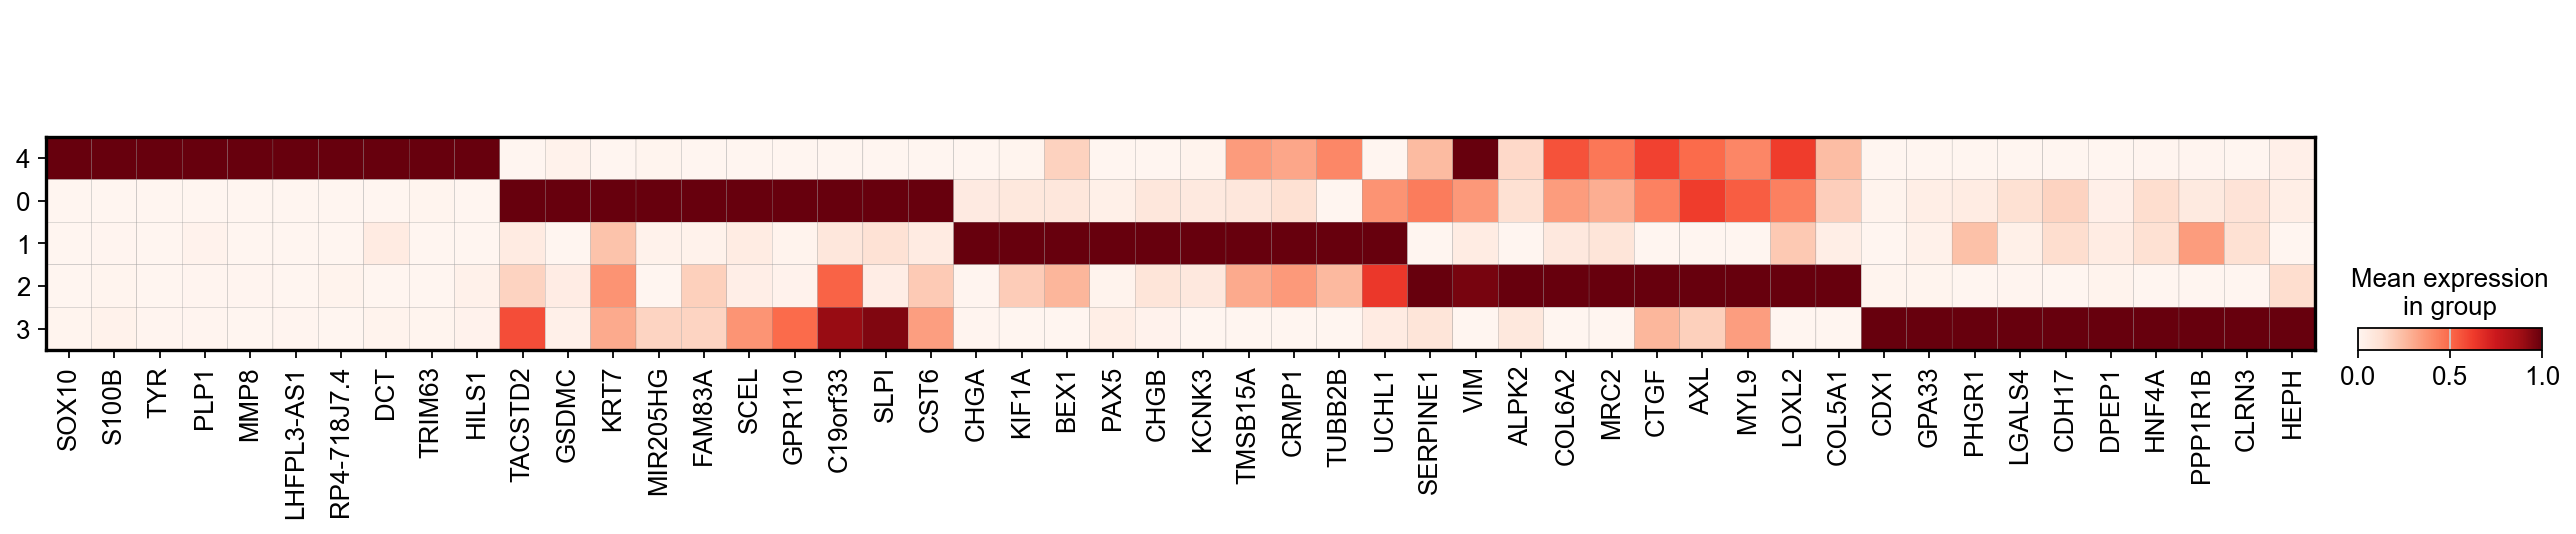

In [76]:
jpplot.matrix_topdiff(adata, groupby='Cluster', n_genes=10)

In [119]:
tmpdf.index = tmpdf['names']


In [121]:
tmpdf[tmpdf.index.str.contains('-')]

names     scores  logfoldchanges         pvals  \
names                                                                   
RP11-599J14.2  RP11-599J14.2  15.827170        5.239397  3.320681e-17   
RP11-347E10.1  RP11-347E10.1  14.915271        6.853983  6.195188e-16   
RP4-718J7.4      RP4-718J7.4  14.833792        9.955390  1.236627e-15   
RP11-582J16.5  RP11-582J16.5  14.314286        2.090682  1.405738e-16   
MAGI2-AS3          MAGI2-AS3  12.343554        3.738707  5.331202e-16   
...                      ...        ...             ...           ...   
RP11-800A3.4    RP11-800A3.4 -13.063854       -5.175529  1.348875e-29   
RP3-416H24.1    RP3-416H24.1 -13.580915       -5.922943  4.703886e-31   
RP3-523K23.2    RP3-523K23.2 -13.798074       -5.471245  7.404117e-32   
RP11-465B22.8  RP11-465B22.8 -15.389342       -5.497483  8.049116e-37   
FAM83H-AS1        FAM83H-AS1 -16.668936       -3.617340  2.135311e-42   

                  pvals_adj  pct_nz_group  pct_nz_reference  nz_enrich  
names                                                                   
RP11-599J14.2  6.570574e-16       1.00000          0.995455   0.999900  
RP11-347E10.1  1.052493e-14       1.00000          0.604545   0.999900  
RP4-718J7.4    2.031449e-14       1.00000          0.281818   0.999900  
RP11-582J16.5  2.584430e-15       1.00000          1.000000   0.999900  
MAGI2-AS3      9.139089e-15       1.00000          0.909091   0.999900  
...                     ...           ...               ...        ...  
RP11-800A3.4   7.700050e-28       0.90625          0.995455   0.999890  
RP3-416H24.1   3.064820e-29       0.81250          0.968182   0.999877  
RP3-523K23.2   4.972518e-30       0.78125          0.900000   0.999872  
RP11-465B22.8  7.123780e-35       1.00000          0.981818   0.999900  
FAM83H-AS1     2.802166e-40       1.00000          1.000000   0.999900  

[391 rows x 8 columns]

In [129]:
def marker_list(adata, n_genes = 8, sort_key = 'logfoldchanges', flatten=False, p_val_thresh=1e-6):
    sort_key in ['scores','logfoldchanges','pvals','pvals_adj']
    groupby = adata.uns['rank_genes_groups']['params']['groupby']
    groups = sorted(adata.obs[groupby].unique())
    epsilon = 1e-4

    ascending=True
    if sort_key in ['scores','logfoldchanges']:
        ascending=False
        
    marker_dict = {}
    for group in groups:
        tmpdf = sc.get.rank_genes_groups_df(adata, group=group)
        tmpdf.index = tmpdf['names']
        tmpdf = tmpdf[tmpdf['pvals_adj'] < p_val_thresh]
        tmpdf = tmpdf.sort_values(by=sort_key, ascending=ascending)
        marker_dict[group] = tmpdf['names'][:n_genes].tolist()
    
    
    if flatten:
        marker_list = []
        for key, sublist in marker_dict.items():
            marker_list.extend(sublist)
        return marker_list
    
    return marker_dict

['TACSTD2',
 'GSDMC',
 'CHGA',
 'KIF1A',
 'SERPINE1',
 'VIM',
 'CDX1',
 'GPA33',
 'SOX10',
 'S100B']

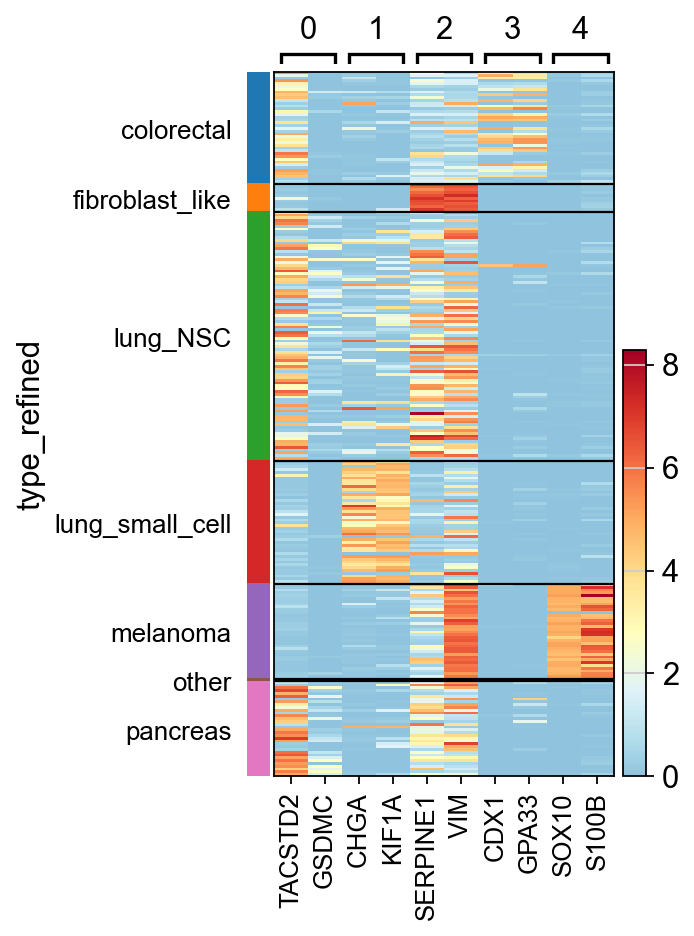

In [125]:
sc.pl.heatmap(adata, groupby='type_refined', var_names=marker_list(adata, n_genes=2, p_val_thresh=1e-3), cmap=jpplot.cmapjp())

In [133]:
m2

Pathology     Site_Primary           Histology  Gender  \
Cell_Line                                                                      
A101D_SKIN              primary             skin  malignant_melanoma    male   
A2058_SKIN           metastasis             skin  malignant_melanoma    male   
A375_SKIN               primary             skin  malignant_melanoma  female   
A549_LUNG               primary             lung           carcinoma    male   
ABC1_LUNG               primary             lung           carcinoma    male   
...                         ...              ...                 ...     ...   
T84_LARGE_INTESTINE  metastasis  large_intestine           carcinoma    male   
TCCPAN2_PANCREAS        primary         pancreas           carcinoma  female   
WM115_SKIN              primary             skin  malignant_melanoma  female   
WM2664_SKIN          metastasis             skin  malignant_melanoma  female   
YAPC_PANCREAS        metastasis         pancreas           carcinoma    male   

                      Age inferred_ethnicity        type type_refined  \
Cell_Line                                                               
A101D_SKIN           56.0          Caucasian    melanoma     melanoma   
A2058_SKIN           43.0          Caucasian    melanoma     melanoma   
A375_SKIN            54.0          Caucasian    melanoma     melanoma   
A549_LUNG            58.0          Caucasian    lung_NSC     lung_NSC   
ABC1_LUNG            47.0              Asian    lung_NSC     lung_NSC   
...                   ...                ...         ...          ...   
T84_LARGE_INTESTINE  72.0          Caucasian  colorectal   colorectal   
TCCPAN2_PANCREAS     68.0              Asian    pancreas     pancreas   
WM115_SKIN           59.0          Caucasian    melanoma     melanoma   
WM2664_SKIN          58.0          Caucasian    melanoma     melanoma   
YAPC_PANCREAS        43.0              Asian    pancreas     pancreas   

                        mutRate leiden Cluster  
Cell_Line                                       
A101D_SKIN            78.145129      5       4  
A2058_SKIN           164.676892      5       4  
A375_SKIN            150.058138      5       4  
A549_LUNG            159.491753      0       0  
ABC1_LUNG            146.934953      4       0  
...                         ...    ...     ...  
T84_LARGE_INTESTINE  101.516333      3       3  
TCCPAN2_PANCREAS     181.227373      2       0  
WM115_SKIN           135.062129      5       4  
WM2664_SKIN          123.352645      5       4  
YAPC_PANCREAS        115.525406      2       0  

[252 rows x 11 columns]

In [147]:
jpplot.ls('data')

Contents of directory: data
Name                                 Size
----------------------------------------
CCLE_rpkm_metadata_forcourse.csv.gz   20.90 KB
CCLE_rpkm_forcourse.csv.gz       31.73 MB


In [484]:
m3

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA     KIF1A    SERPINE1         VIM  \
Cell_Line                                                                   
A101D_SKIN           0.013799  0.088763  0.033668   11.662700  368.391000   
A2058_SKIN           0.015156  0.146858  0.021010    1.003600  425.828000   
A375_SKIN            0.016373  0.052659  1.212030    0.442971  346.978000   
A549_LUNG            0.027520  0.343523  0.187282  387.786000  167.851000   
ABC1_LUNG            0.243177  0.049501  4.412220    0.256649    0.320188   
...                       ...       ...       ...         ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  0.007758    1.185550    0.362116   
TCCPAN2_PANCREAS     0.000000  0.172712  0.059824   65.437300  174.231000   
WM115_SKIN           0.002658  0.138083  0.084740   35.925900  585.540000   
WM2664_SKIN          0.013869  0.223024  0.149958    8.294870  592.755000   
YAPC_PANCREAS        3.723760  0.148591  0.983737   10.380900    7.499590   

                          CDX1      GPA33       SOX10        S100B       XIST  
Cell_Line                                                                      
A101D_SKIN            0.004263   0.000000  109.756000   486.986000  17.982500  
A2058_SKIN            0.007804   0.013697  105.852000   141.834000   0.025915  
A375_SKIN             0.025291   0.071027  144.128000    44.639000  21.443700  
A549_LUNG             0.000000   0.004522    0.013126     0.018757   0.015292  
ABC1_LUNG             0.009510   0.033383    0.009229     0.011539   0.016126  
...                        ...        ...         ...          ...        ...  
T84_LARGE_INTESTINE  55.777200  96.380200    0.044742     0.101396   0.020360  
TCCPAN2_PANCREAS      0.026142   2.240720    0.098306     0.721637   0.093281  
WM115_SKIN            0.020527   0.012010  150.382000  1281.780000   0.037131  
WM2664_SKIN           0.053557   0.056403  136.494000   575.329000   0.198294  
YAPC_PANCREAS         0.057092   0.045930    0.100421     0.580180   0.136149  

[252 rows x 18 columns]

In [485]:
genes = marker_list(adata, n_genes=2, flatten=True) + ['XIST','MYC']
m3 = m2.iloc[:,:-2].merge(rpkm.loc[m2.index,genes], left_index=True, right_index=True, how='left')
m3 = m3.drop(columns=['Histology','type_refined'])

m3.to_csv('data/CCLE_tiny.csv.gz', compression='gzip')
m3

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA     KIF1A    SERPINE1         VIM  \
Cell_Line                                                                   
A101D_SKIN           0.013799  0.088763  0.033668   11.662700  368.391000   
A2058_SKIN           0.015156  0.146858  0.021010    1.003600  425.828000   
A375_SKIN            0.016373  0.052659  1.212030    0.442971  346.978000   
A549_LUNG            0.027520  0.343523  0.187282  387.786000  167.851000   
ABC1_LUNG            0.243177  0.049501  4.412220    0.256649    0.320188   
...                       ...       ...       ...         ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  0.007758    1.185550    0.362116   
TCCPAN2_PANCREAS     0.000000  0.172712  0.059824   65.437300  174.231000   
WM115_SKIN           0.002658  0.138083  0.084740   35.925900  585.540000   
WM2664_SKIN          0.013869  0.223024  0.149958    8.294870  592.755000   
YAPC_PANCREAS        3.723760  0.148591  0.983737   10.380900    7.499590   

                          CDX1      GPA33       SOX10        S100B       XIST  \
Cell_Line                                                                       
A101D_SKIN            0.004263   0.000000  109.756000   486.986000  17.982500   
A2058_SKIN            0.007804   0.013697  105.852000   141.834000   0.025915   
A375_SKIN             0.025291   0.071027  144.128000    44.639000  21.443700   
A549_LUNG             0.000000   0.004522    0.013126     0.018757   0.015292   
ABC1_LUNG             0.009510   0.033383    0.009229     0.011539   0.016126   
...                        ...        ...         ...          ...        ...   
T84_LARGE_INTESTINE  55.777200  96.380200    0.044742     0.101396   0.020360   
TCCPAN2_PANCREAS      0.026142   2.240720    0.098306     0.721637   0.093281   
WM115_SKIN            0.020527   0.012010  150.382000  1281.780000   0.037131   
WM2664_SKIN           0.053557   0.056403  136.494000   575.329000   0.198294   
YAPC_PANCREAS         0.057092   0.045930    0.100421     0.580180   0.136149   

                          MYC  
Cell_Line                      
A101D_SKIN            7.2001

In [149]:
var1 = 'type'
var2 = 'type_refined'

n1 = len(m3[var1].unique())
n2 = len(m3[var2].unique())


df = pd.crosstab(m3[var1], m3[var2])

if n1 < n2:
    df = df.T
df

KeyError: 'type_refined'

In [154]:
m3

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA     KIF1A    SERPINE1         VIM  \
Cell_Line                                                                   
A101D_SKIN           0.013799  0.088763  0.033668   11.662700  368.391000   
A2058_SKIN           0.015156  0.146858  0.021010    1.003600  425.828000   
A375_SKIN            0.016373  0.052659  1.212030    0.442971  346.978000   
A549_LUNG            0.027520  0.343523  0.187282  387.786000  167.851000   
ABC1_LUNG            0.243177  0.049501  4.412220    0.256649    0.320188   
...                       ...       ...       ...         ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  0.007758    1.185550    0.362116   
TCCPAN2_PANCREAS     0.000000  0.172712  0.059824   65.437300  174.231000   
WM115_SKIN           0.002658  0.138083  0.084740   35.925900  585.540000   
WM2664_SKIN          0.013869  0.223024  0.149958    8.294870  592.755000   
YAPC_PANCREAS        3.723760  0.148591  0.983737   10.380900    7.499590   

                          CDX1      GPA33       SOX10        S100B  
Cell_Line                                                           
A101D_SKIN            0.004263   0.000000  109.756000   486.986000  
A2058_SKIN            0.007804   0.013697  105.852000   141.834000  
A375_SKIN             0.025291   0.071027  144.128000    44.639000  
A549_LUNG             0.000000   0.004522    0.013126     0.018757  
ABC1_LUNG             0.009510   0.033383    0.009229     0.011539  
...                        ...        ...         ...          ...  
T84_LARGE_INTESTINE  55.777200  96.380200    0.044742     0.101396  
TCCPAN2_PANCREAS      0.026142   2.240720    0.098306     0.721637  
WM115_SKIN            0.020527   0.012010  150.382000  1281.780000  
WM2664_SKIN           0.053557   0.056403  136.494000   575.329000  
YAPC_PANCREAS         0.057092   0.045930    0.100421     0.580180  

[252 rows x 17 columns]

<Axes: xlabel='SERPINE1', ylabel='XIST'>

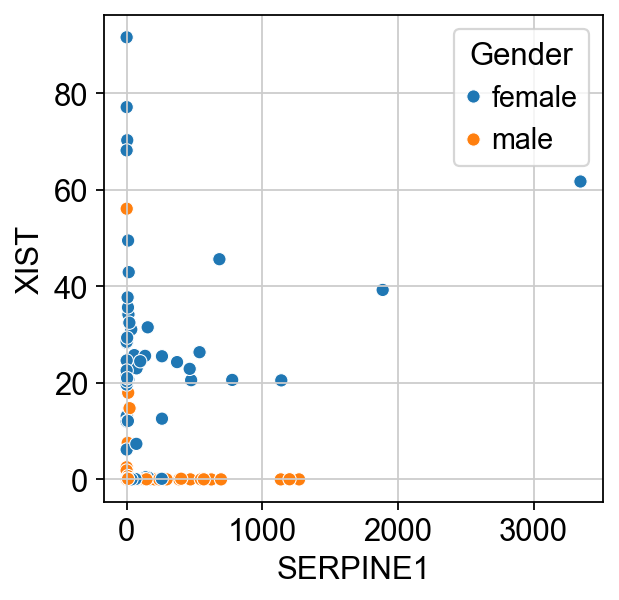

In [163]:
sns.scatterplot(data=m3, x='SERPINE1', y='XIST', hue='Gender')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_39653/1633828541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=m3, x='SERPINE1', y='Site_Primary', palette='husl')


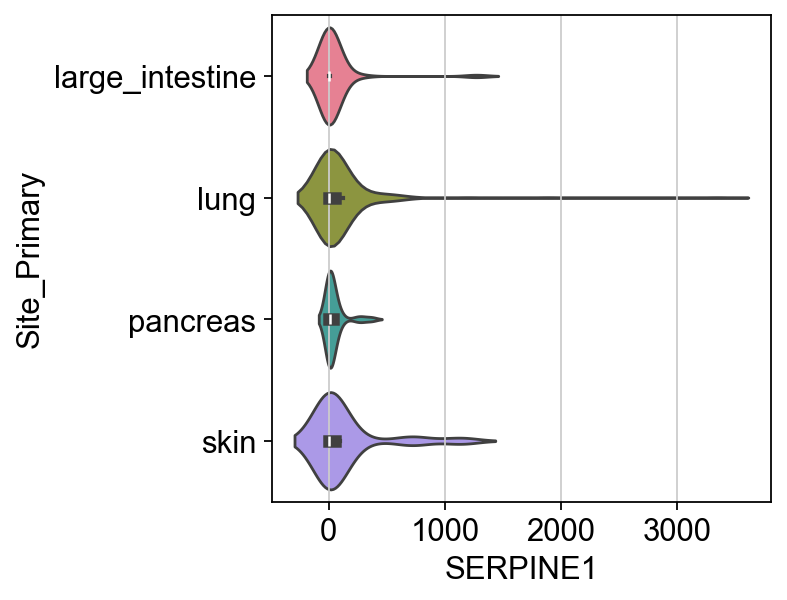

In [155]:
g = sns.violinplot(data=m3, x='SERPINE1', y='Site_Primary', palette='husl')

In [171]:
info = pd.read_csv('/Users/jpreall/Dropbox/Preall_Lab/External/Broad_DepMap/sample_info.csv', index_col=0)
ach_to_ccle = info['CCLE_Name'].to_dict()

In [190]:
#df2 = pd.read_csv('/Users/jpreall/Dropbox/Preall_Lab/External/Broad_DepMap/CRISPR_gene_dependency.csv.gz', index_col=0)

df2['CCLE'] = df2.index.map(ach_to_ccle)
#df2['CCLE'].isin(m3.index)
df2.columns = df2.columns.str.split('\s').str[0]

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_39653/712134887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.iloc[:,2000])


<Axes: xlabel='C9orf84', ylabel='Density'>

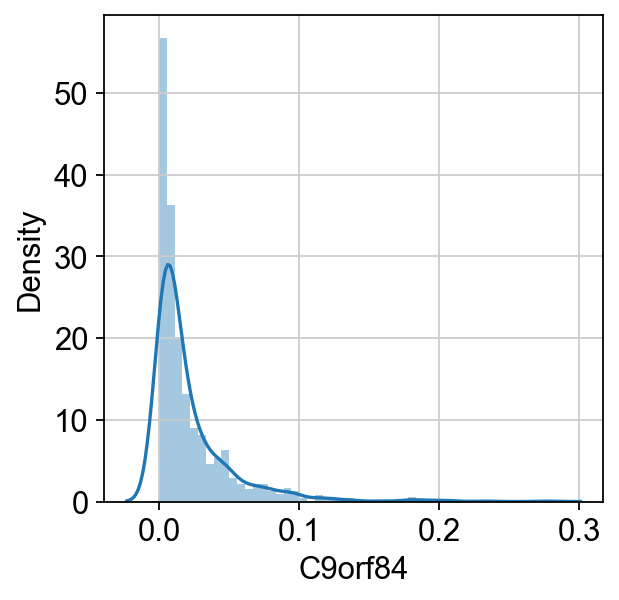

In [200]:
sns.distplot(df2.iloc[:,2000])

In [248]:
kde(left_peak)

array([2.43222693])

In [250]:
#kde(peak_values)
left_peak = peak_values[peak_values < 0.1][0]
right_peak = peak_values[peak_values > 0.8][-1]

left_peak_height = kde(left_peak)
right_peak_height = kde(right_peak)

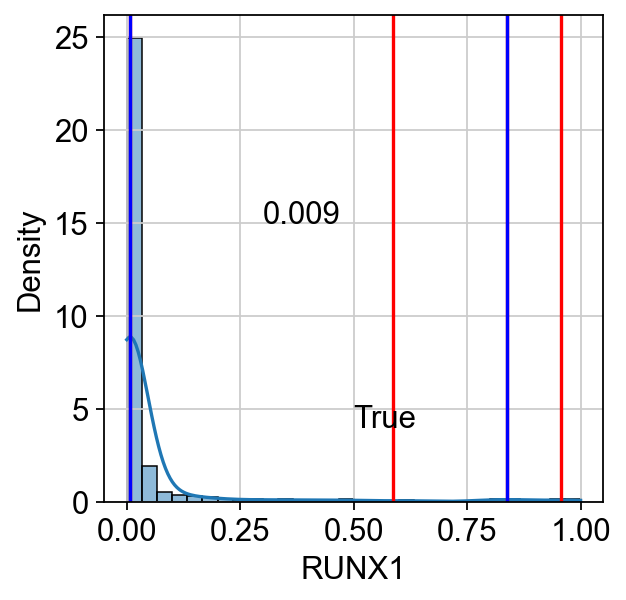

In [292]:
gene = 'RUNX1'
data = df2[gene].dropna()
kde = gaussian_kde(data)
x = np.linspace(0, 1, 1000)
kde_values = kde(x)

# Find local maxima by checking where the derivative changes sign
peaks = (np.diff(np.sign(np.diff(kde_values))) < 0).nonzero()[0] + 1  # index of local max
peak_values = x[peaks]

left_peak = peak_values[peak_values < 0.1][0]
right_peak = peak_values[peak_values > 0.8][-1]


left_peak_height = kde(left_peak)
right_peak_height = kde(right_peak)

if (len(left_peak_height) > 0) and (len(right_peak_height) > 0):
    left_peak = peak_values[np.where(peak_values < .1)][0]
    right_peak = peak_values[np.where(peak_values > 0.8)][0]
    peak_ratio = (right_peak_height/left_peak_height)[0]
        
        
peak_values
sns.histplot(data, kde=True, stat='density', bins=30)
for peak in peak_values:
    plt.axvline(peak, color='r')


is_bimodal = len(peaks) > 1 and any(p < 0.1 for p in peak_values) and any(p > 0.8 for p in peak_values)

plt.text(0.5,4,str(is_bimodal))
plt.axvline(right_peak, color='blue')
plt.axvline(left_peak, color='blue')
plt.text(.3, 15, f'{peak_ratio:.3f}')
plt.show()

In [287]:
if peak_ratio[0] < 1:
    print(peak_ratio[0])

0.009244502884280715


In [271]:
peak_ratio = right_peak_height/left_peak_height

peak_ratio

array([0.19960048])

In [299]:
def is_bimodal(data: pd.Series,
               plot=False):
    
    data = data.dropna()
    
    x = np.linspace(0, 1, 1000)
    kde = gaussian_kde(data, bw_method='silverman')
    kde_values = kde(x)
    
    # Find local maxima by checking where the derivative changes sign
    peaks = (np.diff(np.sign(np.diff(kde_values))) < 0).nonzero()[0] + 1  # index of local max
    peak_values = x[peaks]
    
    peak_ratio = 1e-5
    
    left_peak = peak_values[np.where(peak_values < .1)]
    right_peak = peak_values[np.where(peak_values > 0.8)]
        
    left_peak_height = kde(left_peak)
    right_peak_height = kde(right_peak)
    
    if (len(left_peak_height) > 0) and (len(right_peak_height) > 0):
        left_peak = peak_values[np.where(peak_values < .1)][0]
        right_peak = peak_values[np.where(peak_values > 0.8)][0]
        peak_ratio = (right_peak_height/left_peak_height)[0]
        
    
    if plot:
        plt.figure(figsize=(10, 4))
        sns.histplot(data, kde=True, stat='density', bins=30)
        plt.title(f'Distribution of {gene}')
        for peak in peak_values:
            plt.axvline(x, color='r')
        plt.show()

    
    # Consider it bimodal if there are at least two peaks and they're around 0 and 1
    is_bimodal = len(peaks) > 1 and any(p < 0.1 for p in peak_values) and any(p > 0.8 for p in peak_values)
    
    if peak_ratio < .1:
        is_bimodal = False
    if peak_ratio > .9:
        is_bimodal = False
    
    return is_bimodal

#testdata = df2.loc[:,df2.T.sample(100).index.tolist() + ['YAP1']]


res = testdata.apply(is_bimodal, axis=0)

In [301]:
fulldata = df2.iloc[:,:-1]
fulldata

A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
DepMap_ID                                                                
ACH-000001  0.231850  0.026794  0.018626  0.018995  0.051002  0.006600   
ACH-000004  0.014040  0.019402  0.035422  0.044101  0.050538  0.155701   
ACH-000005  0.103801  0.008419  0.001083  0.010030  0.198028  0.242343   
ACH-000007  0.009837  0.015360  0.002298  0.001979  0.021098  0.012621   
ACH-000009  0.010612  0.016551  0.001856  0.000378  0.041269  0.055036   
...              ...       ...       ...       ...       ...       ...   
ACH-002463  0.009217  0.003996  0.007395  0.029068  0.055772  0.026070   
ACH-002464  0.050613  0.011896  0.005501  0.003284  0.275137  0.082807   
ACH-002467  0.059698  0.002243  0.001029  0.006510  0.150613  0.035774   
ACH-002508  0.032364  0.004213  0.000803  0.001579  0.219092  0.083905   
ACH-002510  0.012559  0.011300  0.008686  0.010105  0.051911  0.030323   

               A4GNT      AAAS      AACS     AADAC  ...    ZWILCH     ZWINT  \
DepMap_ID                                           ...                       
ACH-000001  0.047511  0.312053  0.015506  0.001460  ...  0.081136  0.145149   
ACH-000004  0.000303  0.185888  0.000619  0.002664  ...  0.155826  0.638724   
ACH-000005  0.005002  0.289148  0.050893  0.018539  ...  0.185445  0.448392   
ACH-000007  0.003567  0.191499  0.008165  0.000105  ...  0.169072  0.639115   
ACH-000009  0.016669  0.180403  0.002994  0.001362  ...  0.222138  0.453476   
...              ...       ...       ...       ...  ...       ...       ...   
ACH-002463  0.002339  0.472018  0.001615  0.004841  ...  0.641223  0.956552   
ACH-002464  0.016606  0.016293  0.003424  0.018182  ...  0.674311  0.300264   
ACH-002467  0.003765  0.046703  0.112719  0.003711  ...  0.318791  0.964133   
ACH-002508  0.001304  0.403934  0.006401  0.000950  ...  0.008622  0.186744   
ACH-002510  0.029293  0.080131  0.089043  0.008279  ...  0.150205  0.906191   

                ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
DepMap_ID                                                                
ACH-000001  0.016283  0.001686  0.000625  0.038392  0.018294  0.000649   
ACH-000004  0.003172  0.005558  0.001574  0.002917  0.388513  0.002298   
ACH-000005  0.025298  0.013515  0.006789  0.073571  0.048639  0.025909   
ACH-000007  0.009266  0.000530  0.001050  0.014569  0.358013  0.007491   
ACH-000009  0.007069  0.000280  0.015121  0.133603  0.473423  0.005552   
...              ...       ...       ...       ...       ...       ...   
ACH-002463  0.017702  0.006855  0.031597  0.000891  0.070472  0.131002   
ACH-002464  0.099703  0.046795  0.002245  0.004199  0.203709  0.049539   
ACH-002467  0.000861  0.001005  0.022277  0.037376  0.072583  0.007481   
ACH-002508  0.003994  0.000022  0.060748  0.005891  0.024810  0.014812   
ACH-002510  0.037674  0.071200  0.006436  0.060129  0.071471  0.033475   

               ZZEF1      ZZZ3  
DepMap_ID                       
ACH-000001  0.003334  0.434678  
ACH-000004  0.001151  0.131712  
ACH-000005  0.016505  0.185986  
ACH-000007  0.307687  0.574246  
ACH-000009  0.050182  0.436285  
...              ...       ...  
ACH-002463  0.108145  0.687614  
ACH-002464  0.028856  0.550548  
ACH-002467  0.048437  0.953013  
ACH-002508  0.100032  0.022639  
ACH-002510  0.093379  0.365735  

[946 rows x 17645 columns]

In [303]:
bigres = fulldata.apply(is_bimodal, axis=0)

In [305]:
bigres[bigres]

ACSL3       True
ARHGEF7     True
ATP1B3      True
C16orf72    True
CCND3       True
CYB5B       True
DERL2       True
DHRSX       True
EAF1        True
EGFR        True
ELMO2       True
EP300       True
FASN        True
FBXO42      True
FOSL1       True
GART        True
IER3IP1     True
IGF1R       True
IRS2        True
KCTD10      True
KDSR        True
KEAP1       True
KLF5        True
LDB1        True
MDM2        True
NAMPT       True
NMNAT1      True
NXT1        True
PFAS        True
PTDSS1      True
RHOA        True
RPP25L      True
SLC25A28    True
SLC2A1      True
SLC7A1      True
SOCS3       True
SOX10       True
SOX9        True
SREBF1      True
STX4        True
TIMM17A     True
TRAF2       True
TYMS        True
UBIAD1      True
YAP1        True
ZEB2        True
ZFP36L1     True
ZNF217      True
dtype: bool

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_39653/961990305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['KLF5'])


<Axes: xlabel='KLF5', ylabel='Density'>

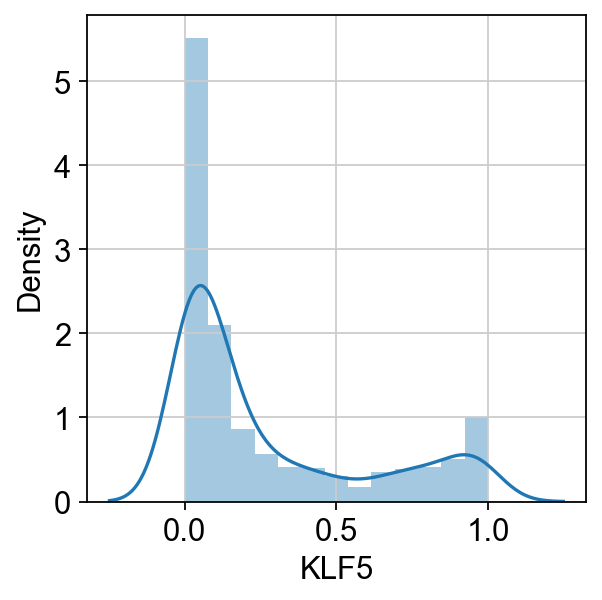

In [309]:
sns.distplot(df2['KLF5'])

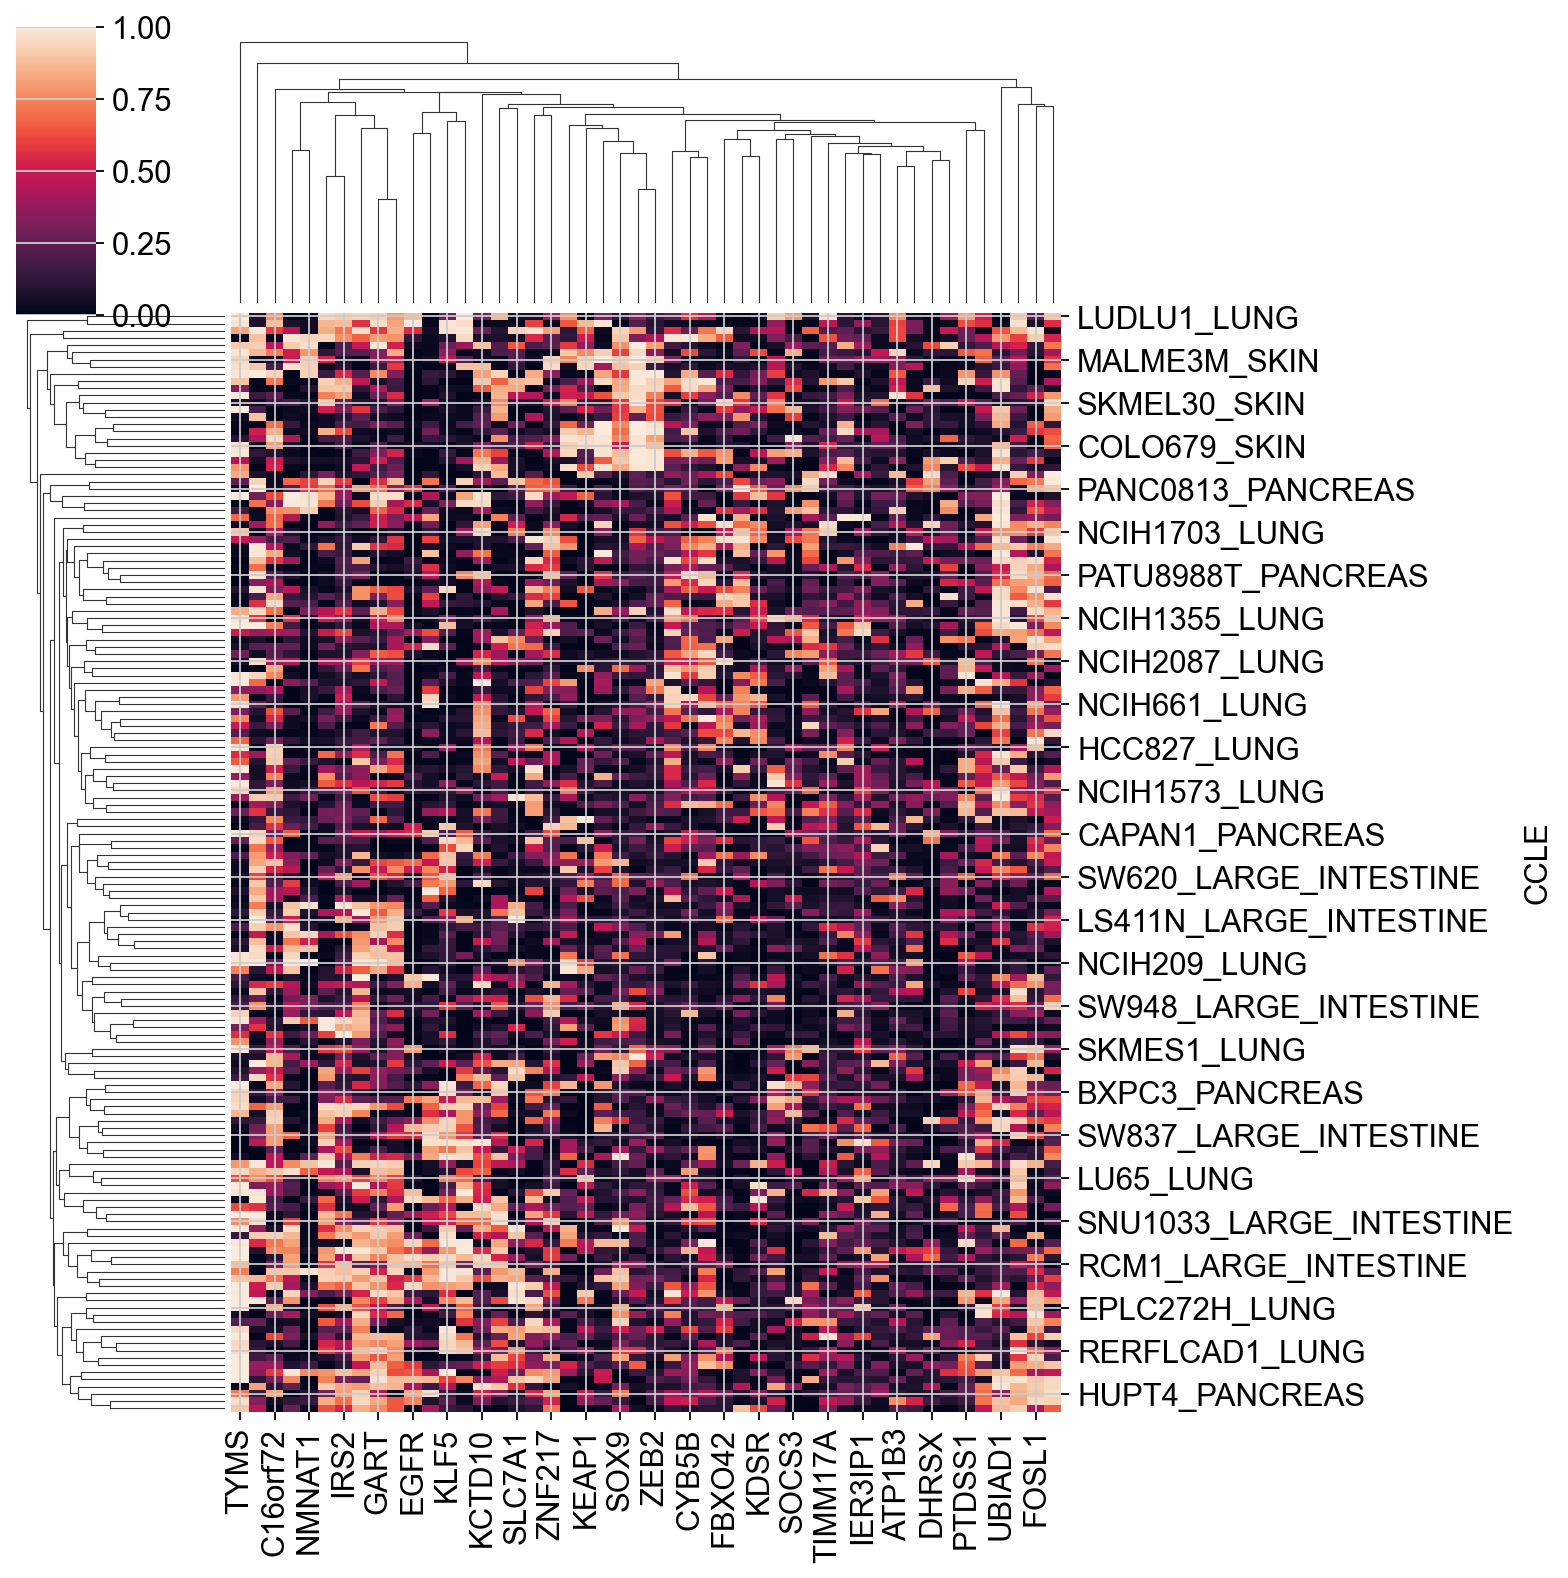

In [329]:
df3 = df2[df2['CCLE'].isin(m3.index)]#.iloc[:,:-1]
df3.set_index('CCLE', inplace=True)
bimodal_deps = df3.loc[:,bigres].fillna(0)
sns.clustermap(bimodal_deps)

In [347]:
bimodal_genes = bigres[bigres]



In [399]:
filtered_data = fulldata.loc[:,bimodal_genes.index.tolist()].fillna(0)

/opt/miniconda3/envs/SeqTech24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/miniconda3/envs/SeqTech24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


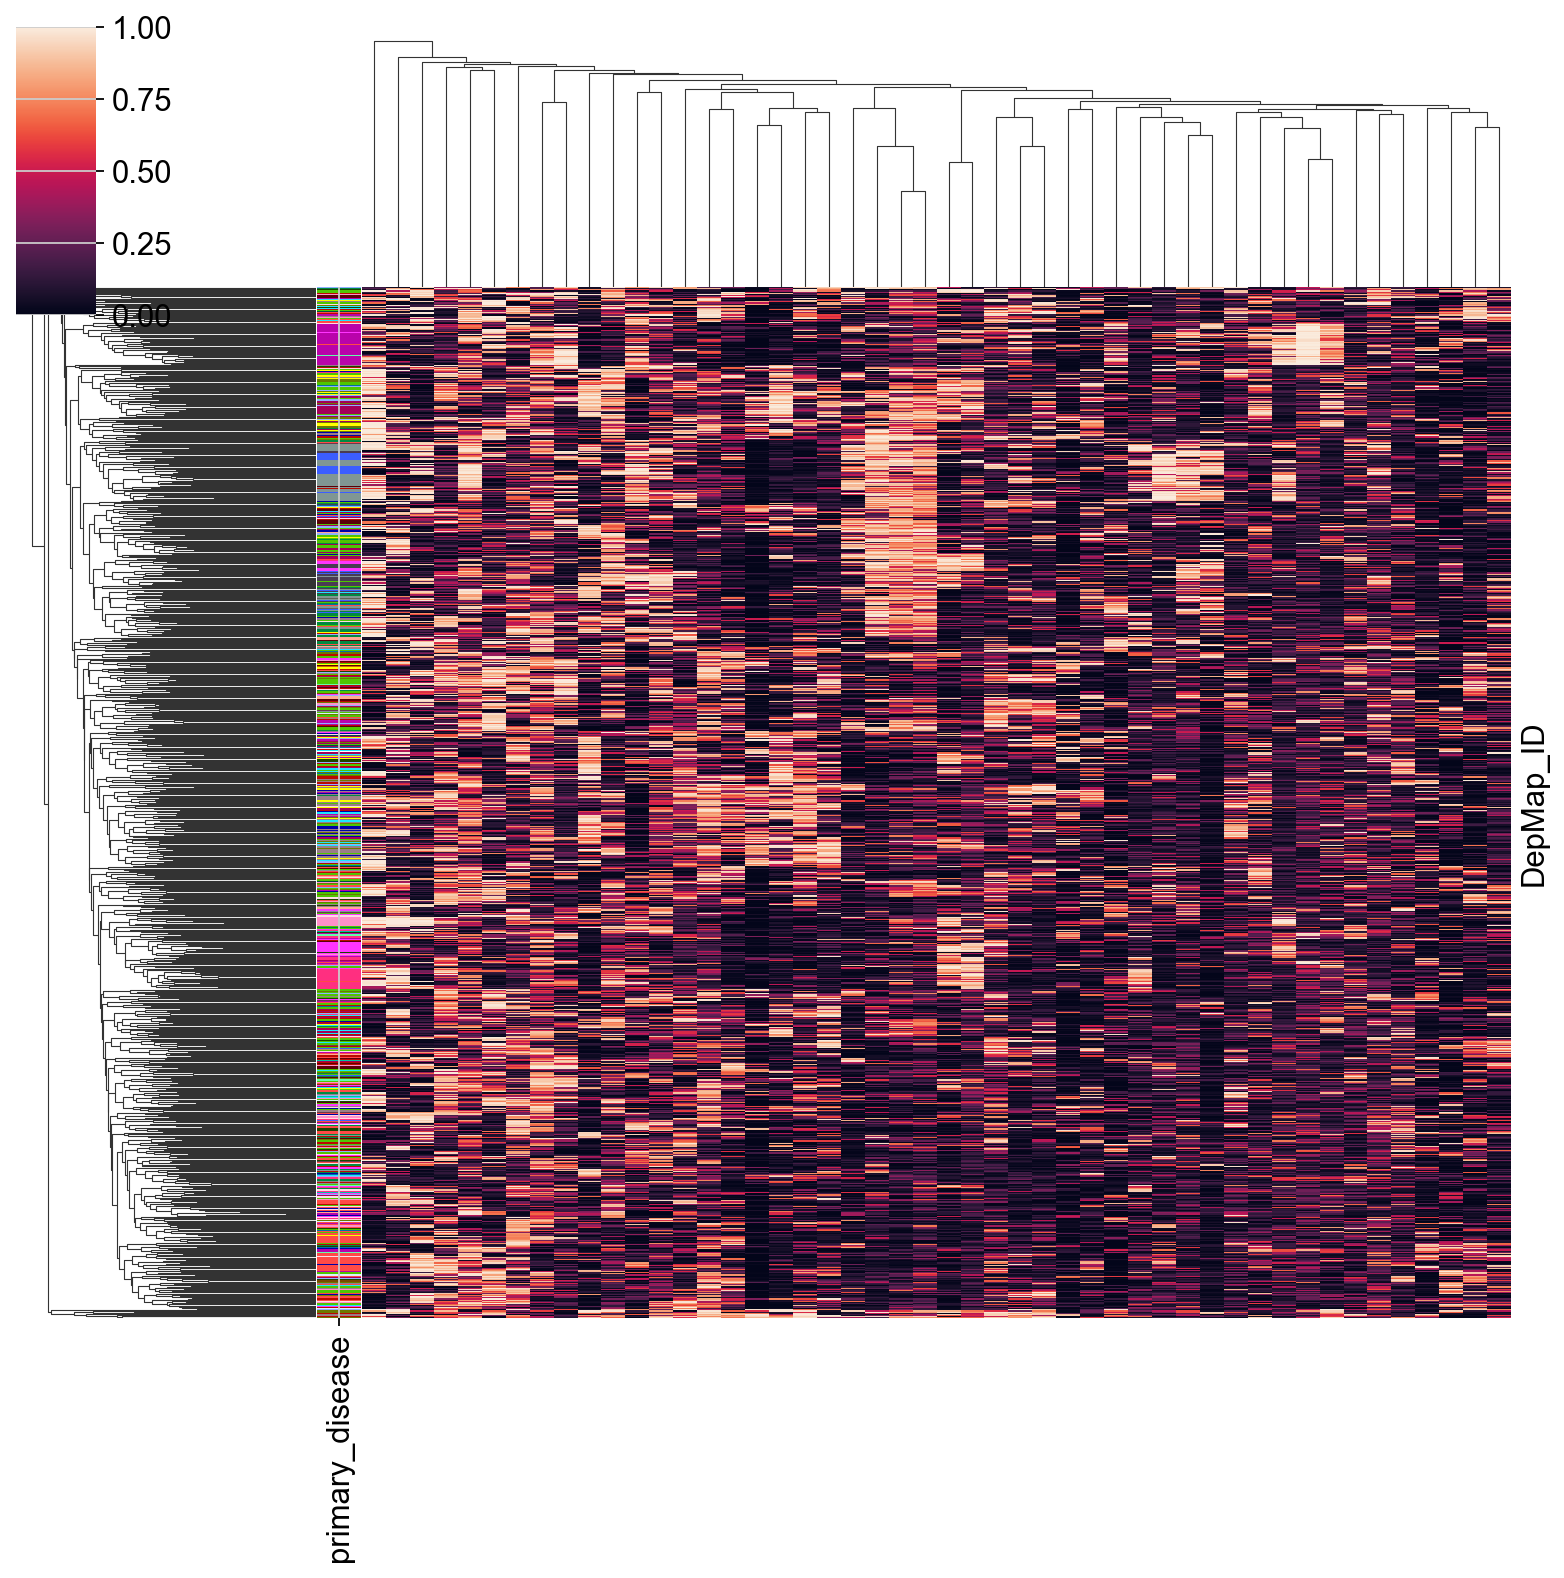

In [434]:
groupby = 'primary_disease'
c_data = bg.obs[groupby]
cdict = jpplot.get_cdict(bg, key=groupby)
row_colors = c_data.map(cdict)
sns.clustermap(filtered_data, row_colors=row_colors, linewidths=0, yticklabels=False, xticklabels=False)


/opt/miniconda3/envs/SeqTech24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/miniconda3/envs/SeqTech24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


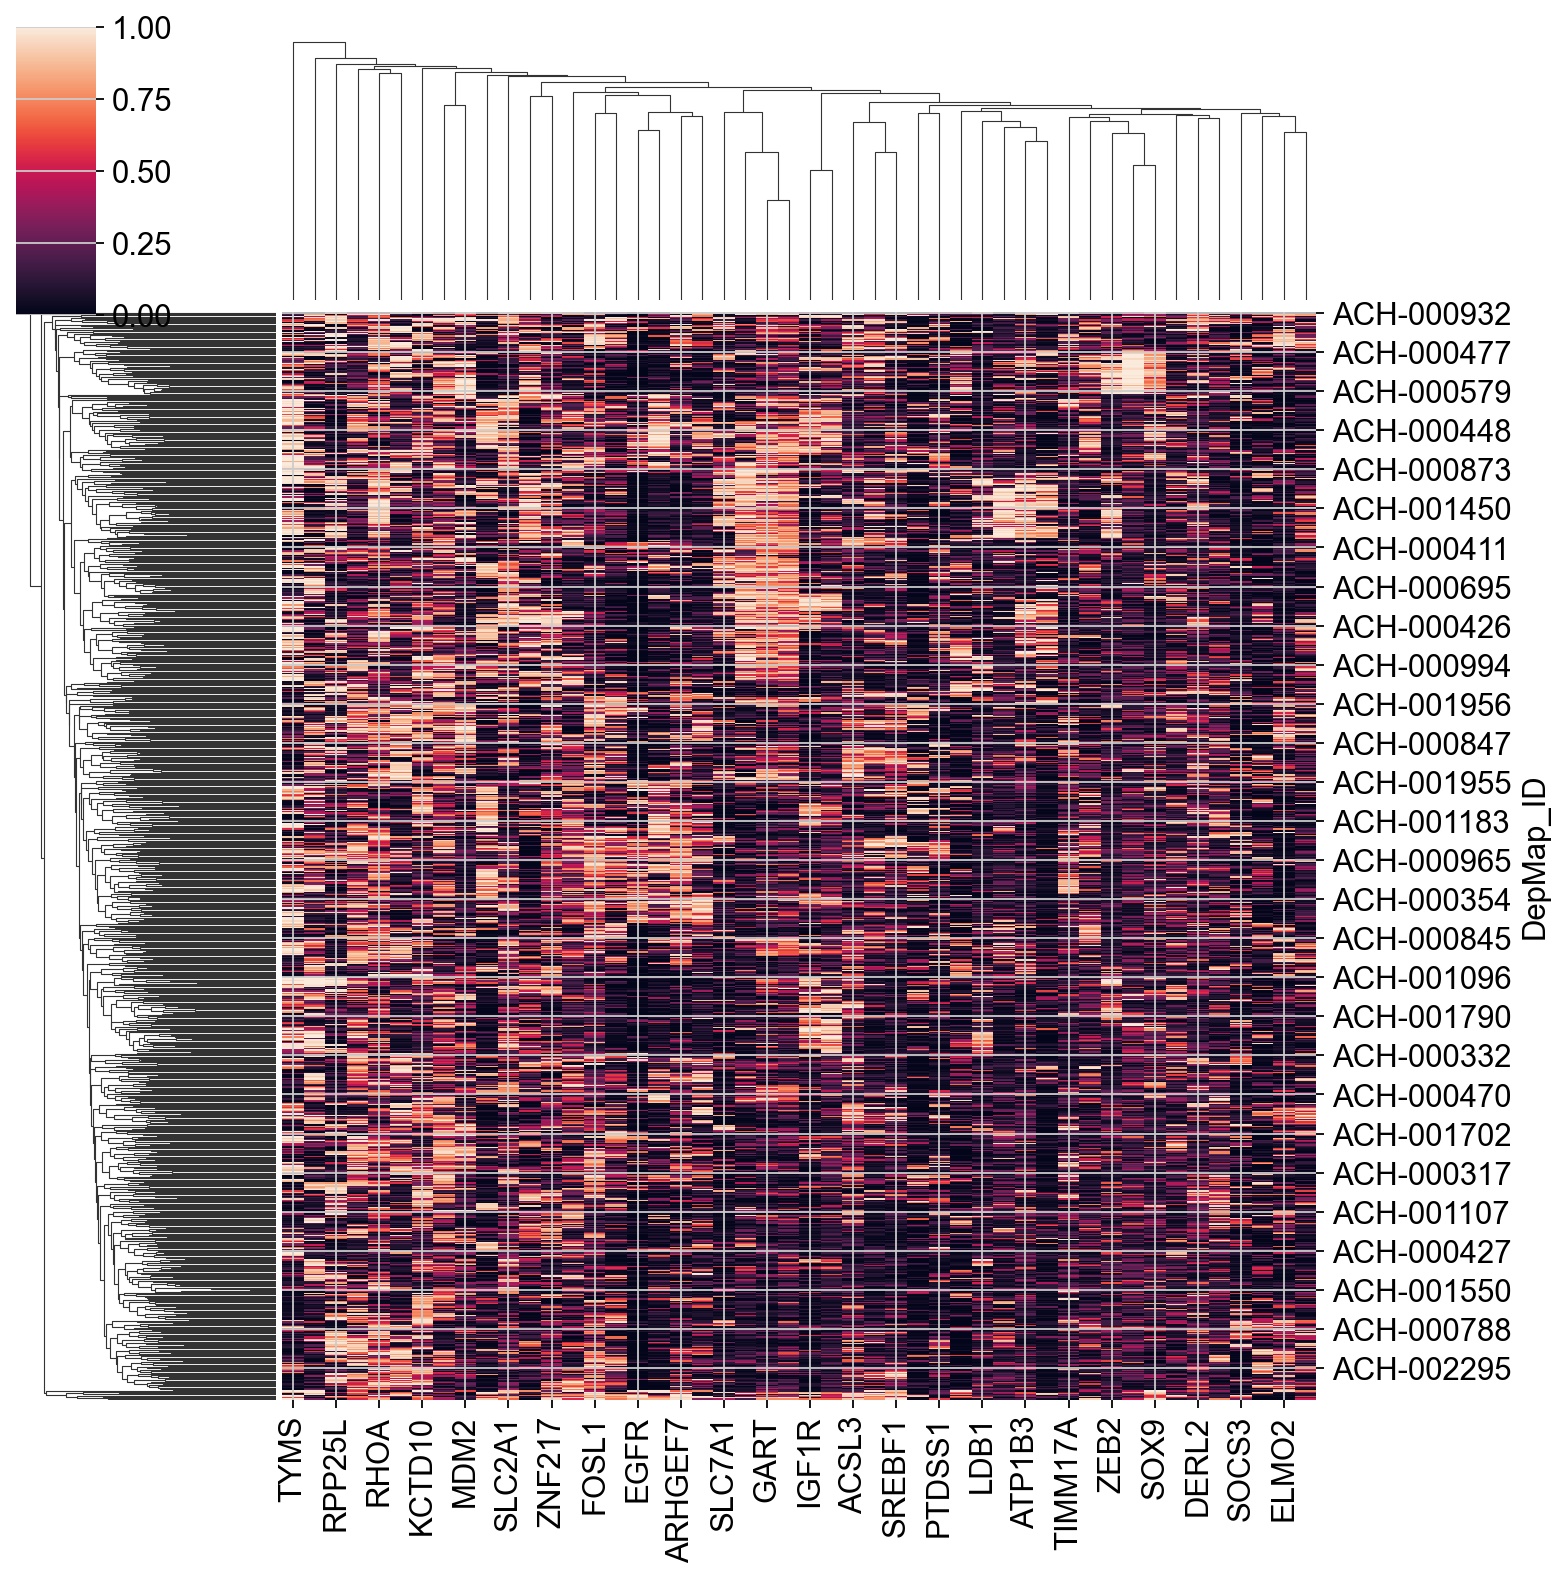

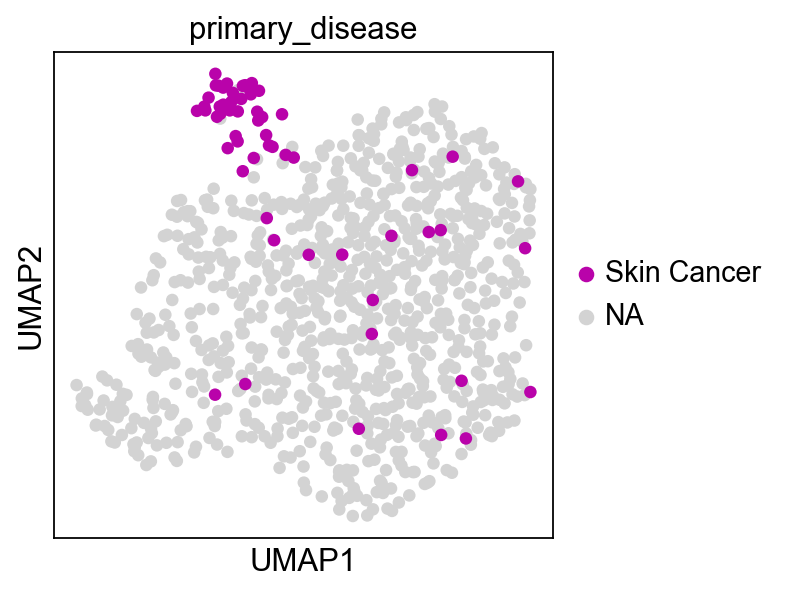

In [398]:
filtered_data = fulldata.loc[:,bimodal_genes.index.tolist()].fillna(0)
bg = sc.AnnData(filtered_data)
keep_lines = [name for name in bg.obs_names if name in info.index]
bg = bg[keep_lines,:].copy()
bg.obs = info.loc[keep_lines]
bg.uns['log1p'] = {}
bg.uns['log1p']['base'] = None
bg.raw = bg.copy()
sc.pp.pca(bg, n_comps=20)
sc.pp.neighbors(bg, n_pcs=10)
sc.tl.leiden(bg, resolution=0.5)
sc.tl.umap(bg)
sc.pl.umap(bg, color='primary_disease', groups=['Skin Cancer'])

In [475]:
m4

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA  ...         VIM       CDX1  \
Cell_Line                                ...                          
A101D_SKIN           0.013799  0.088763  ...  368.391000   0.004263   
A2058_SKIN           0.015156  0.146858  ...  425.828000   0.007804   
A375_SKIN            0.016373  0.052659  ...  346.978000   0.025291   
A549_LUNG            0.027520  0.343523  ...  167.851000   0.000000   
ABC1_LUNG            0.243177  0.049501  ...    0.320188   0.009510   
...                       ...       ...  ...         ...        ...   
T84_LARGE_INTESTINE  0.013058  0.440745  ...    0.362116  55.777200   
TCCPAN2_PANCREAS     0.000000  0.172712  ...  174.231000   0.026142   
WM115_SKIN           0.002658  0.138083  ...  585.540000   0.020527   
WM2664_SKIN          0.013869  0.223024  ...  592.755000   0.053557   
YAPC_PANCREAS        3.723760  0.148591  ...    7.499590   0.057092   

                         GPA33       SOX10        S100B       XIST  \
Cell_Line                                                            
A101D_SKIN            0.000000  109.756000   486.986000  17.982500   
A2058_SKIN            0.013697  105.852000   141.834000   0.025915   
A375_SKIN             0.071027  144.128000    44.639000  21.443700   
A549_LUNG             0.004522    0.013126     0.018757   0.015292   
ABC1_LUNG             0.033383    0.009229     0.011539   0.016126   
...                        ...         ...          ...        ...   
T84_LARGE_INTESTINE  96.380200    0.044742     0.101396   0.020360   
TCCPAN2_PANCREAS      2.240720    0.098306     0.721637   0.093281   
WM115_SKIN            0.012010  150.382000  1281.780000   0.037131   
WM2664_SKIN           0.056403  136.494000   575.329000   0.198294   
YAPC_PANCREAS         0.045930    0.100421     0.580180   0.136149   

                     SOX10_dependency  ZEB2_dependency  KLF5_dependency  \
Cell_Line                                                                 
A101D_SKIN                        NaN              NaN              NaN   
A2058_SKIN                   0.243780         0.617368         0.031718   
A375_SKIN    

/opt/miniconda3/envs/SeqTech24/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


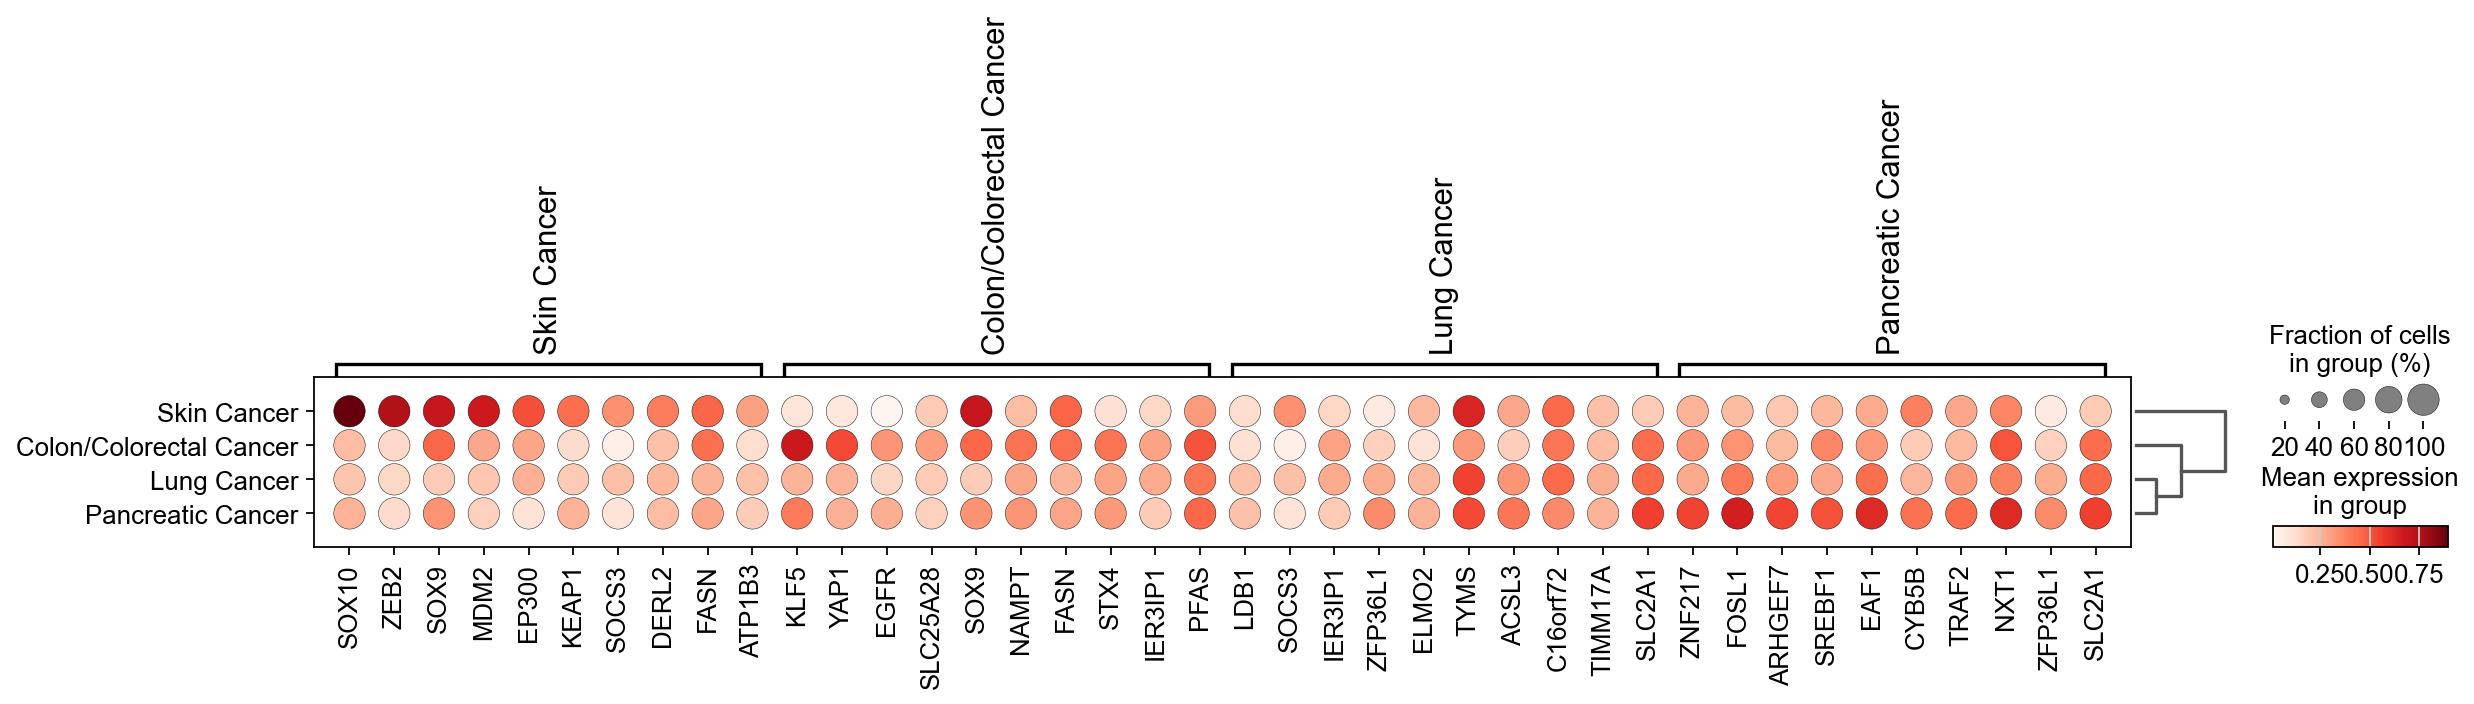

In [486]:
tmp = bg[bg.obs['CCLE_Name'].isin(m3.index)]
jpplot.markers(tmp, groupby='primary_disease')
mygenes = ['SOX10','ZEB2','KLF5','YAP1','MYC']

In [487]:
m4 = m3.copy()
newcols = [f'{name}_dependency' for name in mygenes]
newdf = fulldata.loc[:,mygenes].copy()
newdf.index = newdf.index.map(ach_to_ccle)
newdf.columns = newcols
m4 = m4.merge(newdf, left_index=True, right_index=True, how='left')
#filtered_data.loc[:,mygenes]

<Axes: xlabel='MYC', ylabel='MYC_dependency'>

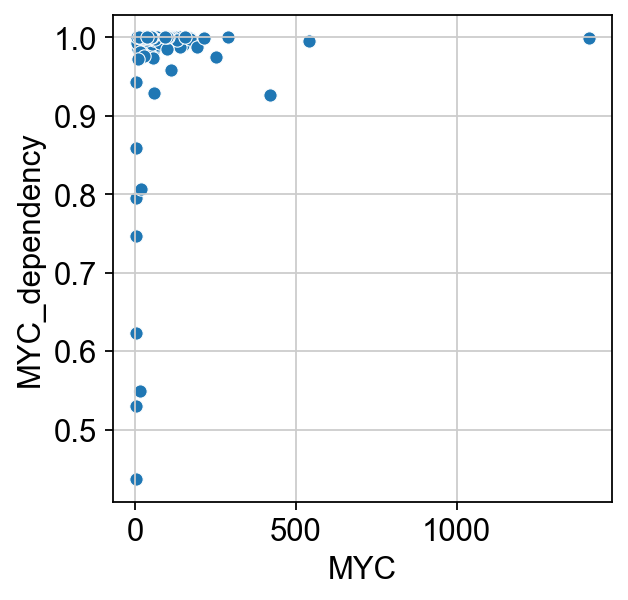

In [489]:
gene = 'MYC'
sns.scatterplot(data = m4, x=gene, y=f'{gene}_dependency')

In [490]:
m4

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA  ...      GPA33       SOX10  \
Cell_Line                                ...                          
A101D_SKIN           0.013799  0.088763  ...   0.000000  109.756000   
A2058_SKIN           0.015156  0.146858  ...   0.013697  105.852000   
A375_SKIN            0.016373  0.052659  ...   0.071027  144.128000   
A549_LUNG            0.027520  0.343523  ...   0.004522    0.013126   
ABC1_LUNG            0.243177  0.049501  ...   0.033383    0.009229   
...                       ...       ...  ...        ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  ...  96.380200    0.044742   
TCCPAN2_PANCREAS     0.000000  0.172712  ...   2.240720    0.098306   
WM115_SKIN           0.002658  0.138083  ...   0.012010  150.382000   
WM2664_SKIN          0.013869  0.223024  ...   0.056403  136.494000   
YAPC_PANCREAS        3.723760  0.148591  ...   0.045930    0.100421   

                           S100B       XIST       MYC  SOX10_dependency  \
Cell_Line                                                                 
A101D_SKIN            486.986000  17.982500   7.20015               NaN   
A2058_SKIN            141.834000   0.025915  11.87060          0.243780   
A375_SKIN              44.639000  21.443700   4.80715          0.932408   
A549_LUNG               0.018757   0.015292  41.59930          0.166272   
ABC1_LUNG               0.011539   0.016126  14.42110          0.393798   
...                          ...        ...       ...               ...   
T84_LARGE_INTESTINE     0.101396   0.020360  90.61300          0.170756   
TCCPAN2_PANCREAS        0.721637   0.093281  23.10740          0.256531   
WM115_SKIN           1281.780000   0.037131   9.92028          1.000000   
WM2664_SKIN           575.329000   0.198294  46.90810          0.984307   
YAPC_PANCREAS           0.580180   0.136149  36.62420          0.370444   

                     ZEB2_dependency  KLF5_dependency  YAP1_dependency  \
Cell_Line                                                                
A101D_SKIN                       NaN              NaN              NaN   
A2058_SKIN                

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_39653/3000531004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=m4, x='SOX10_dependency', y='Site_Primary', palette='husl')


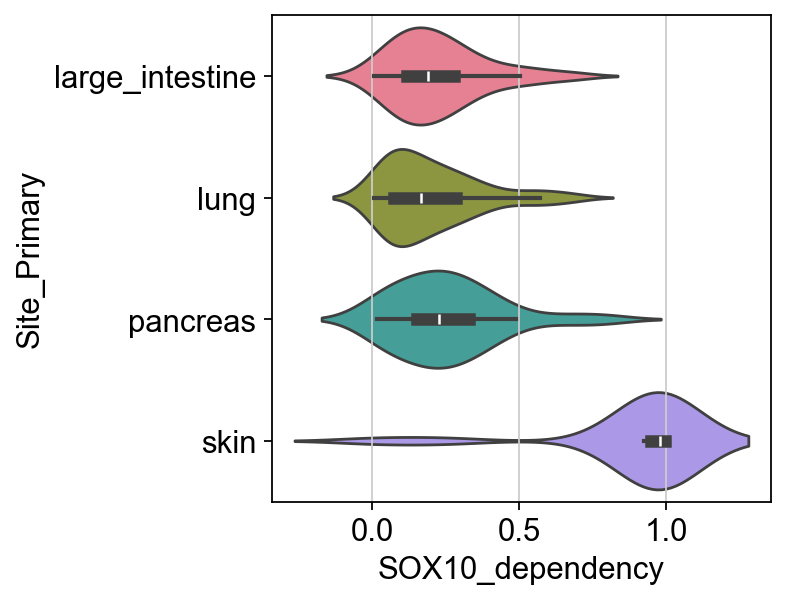

In [474]:
g = sns.violinplot(data=m4, x='SOX10_dependency', y='Site_Primary', palette='husl')
#sns.violinplot(data=m4, x='Site_Primary', y='SOX10_dependency')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

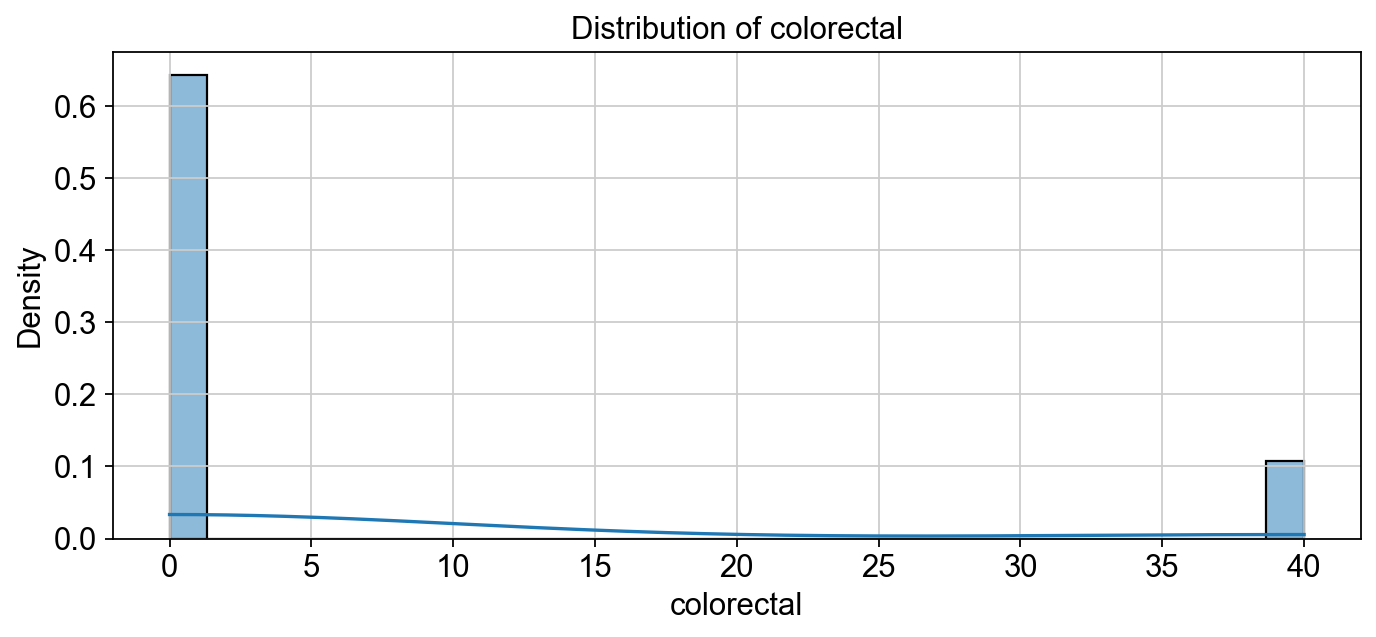

In [202]:
from scipy.stats import gaussian_kde
def is_bimodal(data, gene, plot=False):
    x = np.linspace(0, 1, 1000)
    kde = gaussian_kde(data, bw_method='silverman')
    kde_values = kde(x)
    
    # Find local maxima by checking where the derivative changes sign
    peaks = (np.diff(np.sign(np.diff(kde_values))) < 0).nonzero()[0] + 1  # index of local max
    peak_values = x[peaks]
    
    if plot:
        plt.figure(figsize=(10, 4))
        sns.histplot(data, kde=True, stat='density', bins=30)
        plt.title(f'Distribution of {gene}')
        for peak in peak_values:
            plt.axvline(x[peak], color='r')
        plt.show()
    
    # Consider it bimodal if there are at least two peaks and they're around 0 and 1
    return len(peaks) > 1 and any(p < 0.1 for p in peak_values) and any(p > 0.9 for p in peak_values)

# Check each gene in the DataFrame
bimodal_genes = []
for gene in df.columns:
    if is_bimodal(df[gene], gene, plot=True):  # Set plot to True if you want to see the plots
        bimodal_genes.append(gene)

print("Bimodal genes:", bimodal_genes)

is_bimodal(df2, 'YAP1')

In [436]:
m3['Pathology']

Cell_Line
A101D_SKIN                primary
A2058_SKIN             metastasis
A375_SKIN                 primary
A549_LUNG                 primary
ABC1_LUNG                 primary
                          ...    
T84_LARGE_INTESTINE    metastasis
TCCPAN2_PANCREAS          primary
WM115_SKIN                primary
WM2664_SKIN            metastasis
YAPC_PANCREAS          metastasis
Name: Pathology, Length: 252, dtype: category
Categories (2, object): ['metastasis', 'primary']

<Axes: xlabel='Doubling.Time.Calculated.hrs', ylabel='MYC'>

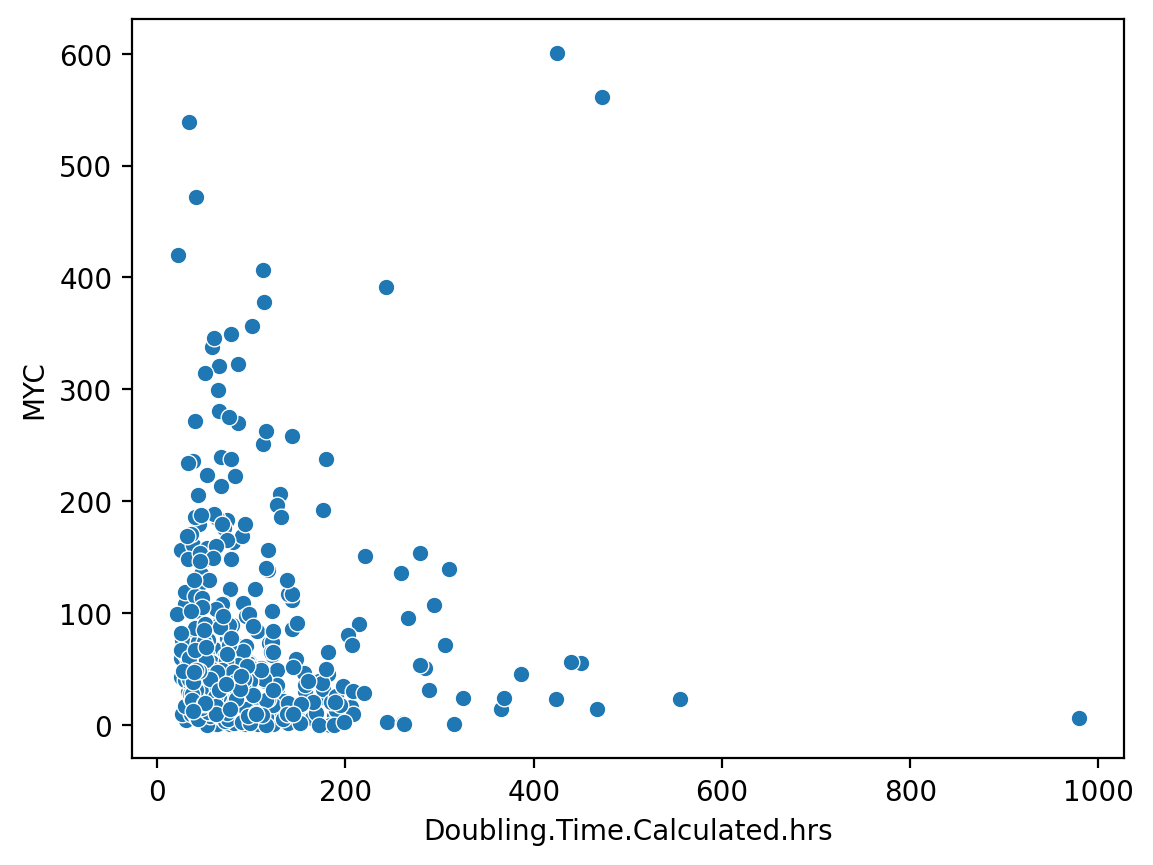

In [11]:
sns.scatterplot(data=data, x='Doubling.Time.Calculated.hrs', y='MYC')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/606267119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')


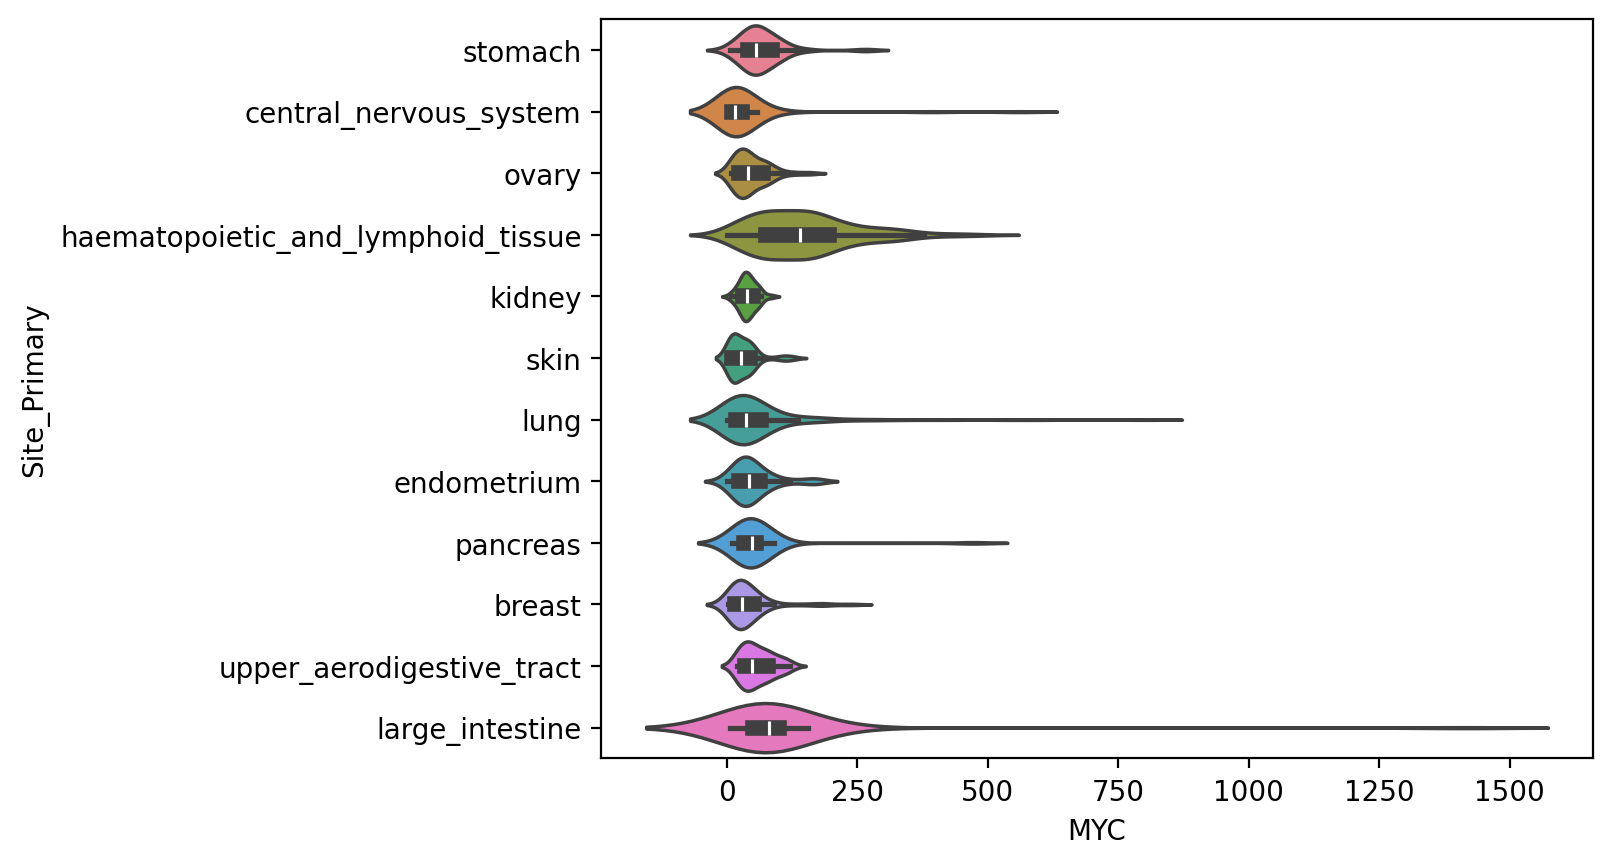

In [42]:
g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


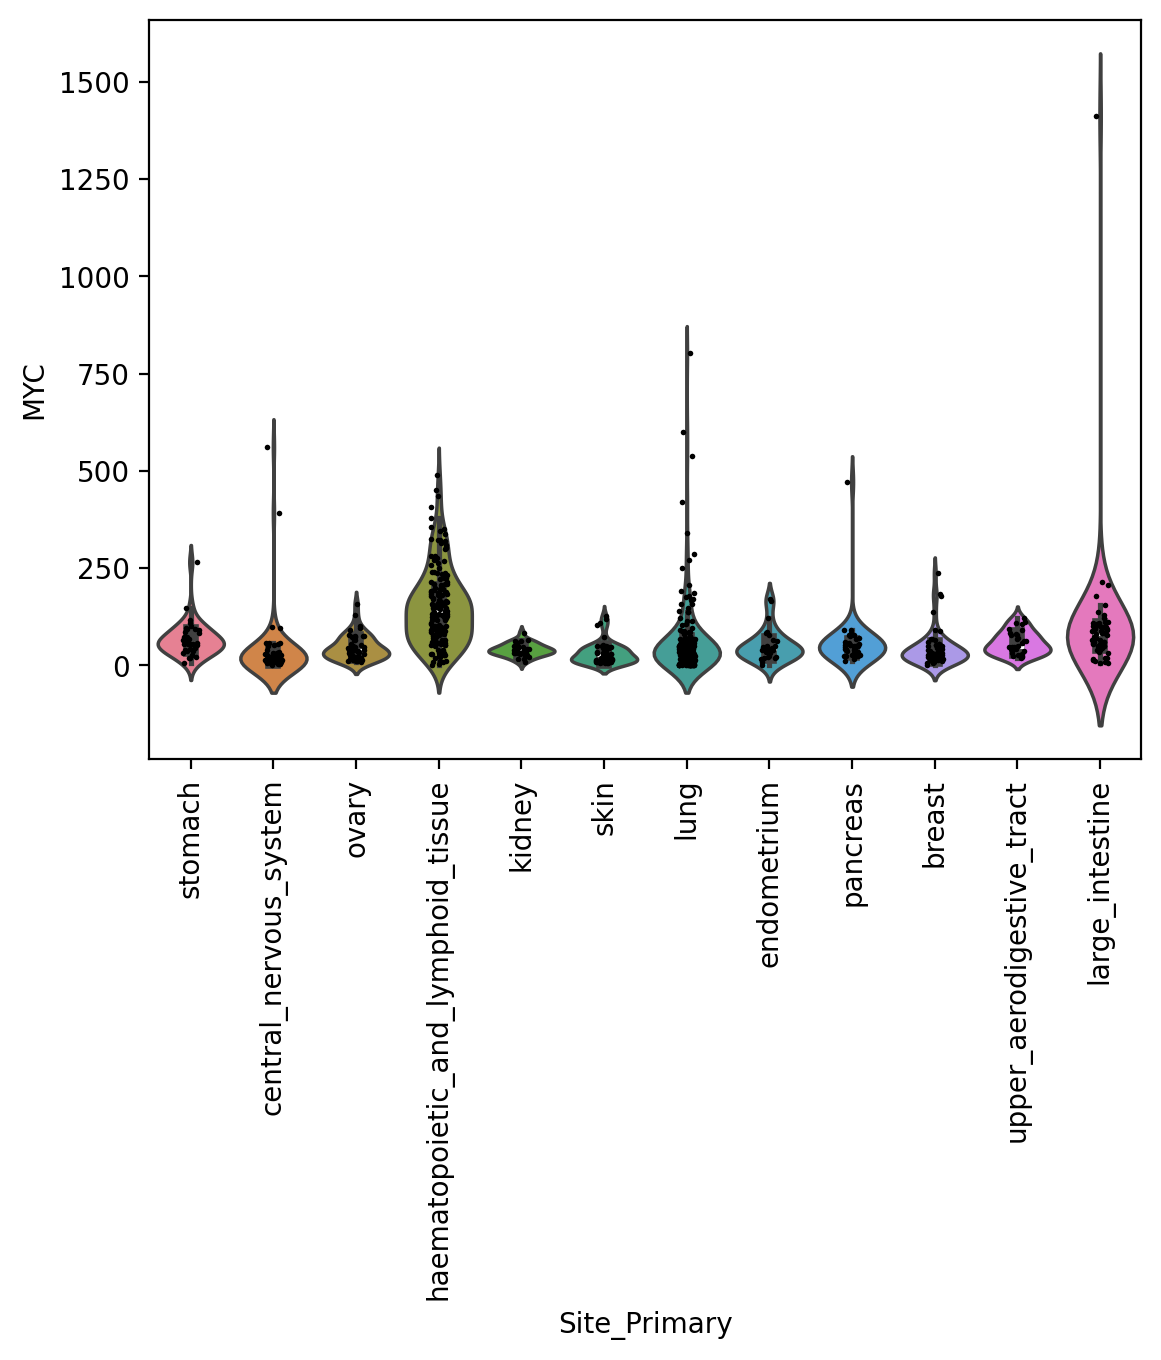

In [37]:
g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
sns.stripplot(data=data, x='Site_Primary', y='MYC', color='black', s=2)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [492]:
m4

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA  ...      GPA33       SOX10  \
Cell_Line                                ...                          
A101D_SKIN           0.013799  0.088763  ...   0.000000  109.756000   
A2058_SKIN           0.015156  0.146858  ...   0.013697  105.852000   
A375_SKIN            0.016373  0.052659  ...   0.071027  144.128000   
A549_LUNG            0.027520  0.343523  ...   0.004522    0.013126   
ABC1_LUNG            0.243177  0.049501  ...   0.033383    0.009229   
...                       ...       ...  ...        ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  ...  96.380200    0.044742   
TCCPAN2_PANCREAS     0.000000  0.172712  ...   2.240720    0.098306   
WM115_SKIN           0.002658  0.138083  ...   0.012010  150.382000   
WM2664_SKIN          0.013869  0.223024  ...   0.056403  136.494000   
YAPC_PANCREAS        3.723760  0.148591  ...   0.045930    0.100421   

                           S100B       XIST       MYC  SOX10_dependency  \
Cell_Line                                                                 
A101D_SKIN            486.986000  17.982500   7.20015               NaN   
A2058_SKIN            141.834000   0.025915  11.87060          0.243780   
A375_SKIN              44.639000  21.443700   4.80715          0.932408   
A549_LUNG               0.018757   0.015292  41.59930          0.166272   
ABC1_LUNG               0.011539   0.016126  14.42110          0.393798   
...                          ...        ...       ...               ...   
T84_LARGE_INTESTINE     0.101396   0.020360  90.61300          0.170756   
TCCPAN2_PANCREAS        0.721637   0.093281  23.10740          0.256531   
WM115_SKIN           1281.780000   0.037131   9.92028          1.000000   
WM2664_SKIN           575.329000   0.198294  46.90810          0.984307   
YAPC_PANCREAS           0.580180   0.136149  36.62420          0.370444   

                     ZEB2_dependency  KLF5_dependency  YAP1_dependency  \
Cell_Line                                                                
A101D_SKIN                       NaN              NaN              NaN   
A2058_SKIN                

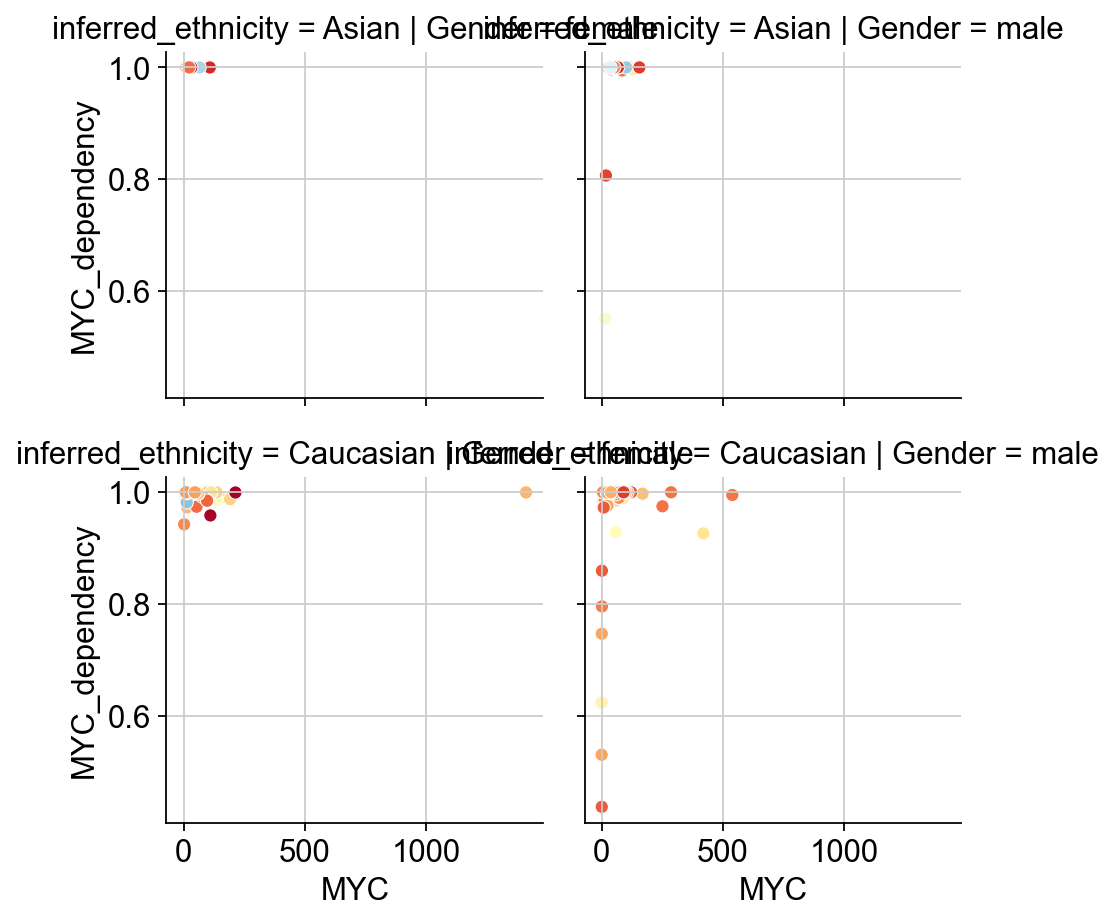

In [510]:
data = m4.copy()
key1 = 'inferred_ethnicity'
key2 = 'Gender'
data = data[data[key1].isin(['Asian','Caucasian'])]

data[key1] = data[key1].cat.remove_unused_categories()
g = sns.FacetGrid(data, col=key2,  row=key1)
g.map(sns.scatterplot, "MYC","MYC_dependency","Age", palette=jpplot.cmapjp())
plt.tight_layout()

<Axes: ylabel='type'>

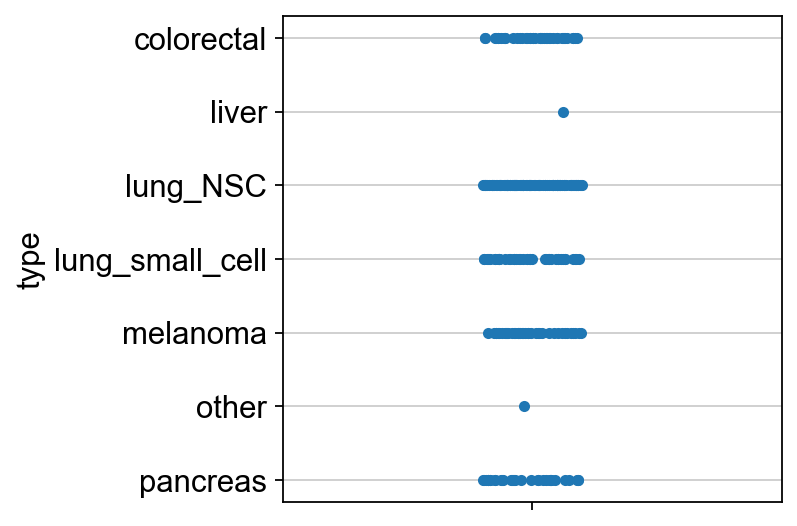

In [518]:
deps = [name for name in m4.columns if '_dependency' in name]
sns.stripplot(data=m4, y='type', x=)

In [544]:
m4.melt(id_vars='Site_Primary', value_vars=deps, var_name='Dependency', value_name='Value')

Site_Primary        Dependency     Value
0                skin  SOX10_dependency       NaN
1                skin  SOX10_dependency  0.243780
2                skin  SOX10_dependency  0.932408
3                lung  SOX10_dependency  0.166272
4                lung  SOX10_dependency  0.393798
...               ...               ...       ...
1255  large_intestine    MYC_dependency  0.999961
1256         pancreas    MYC_dependency  1.000000
1257             skin    MYC_dependency  1.000000
1258             skin    MYC_dependency  0.999970
1259         pancreas    MYC_dependency  1.000000

[1260 rows x 3 columns]

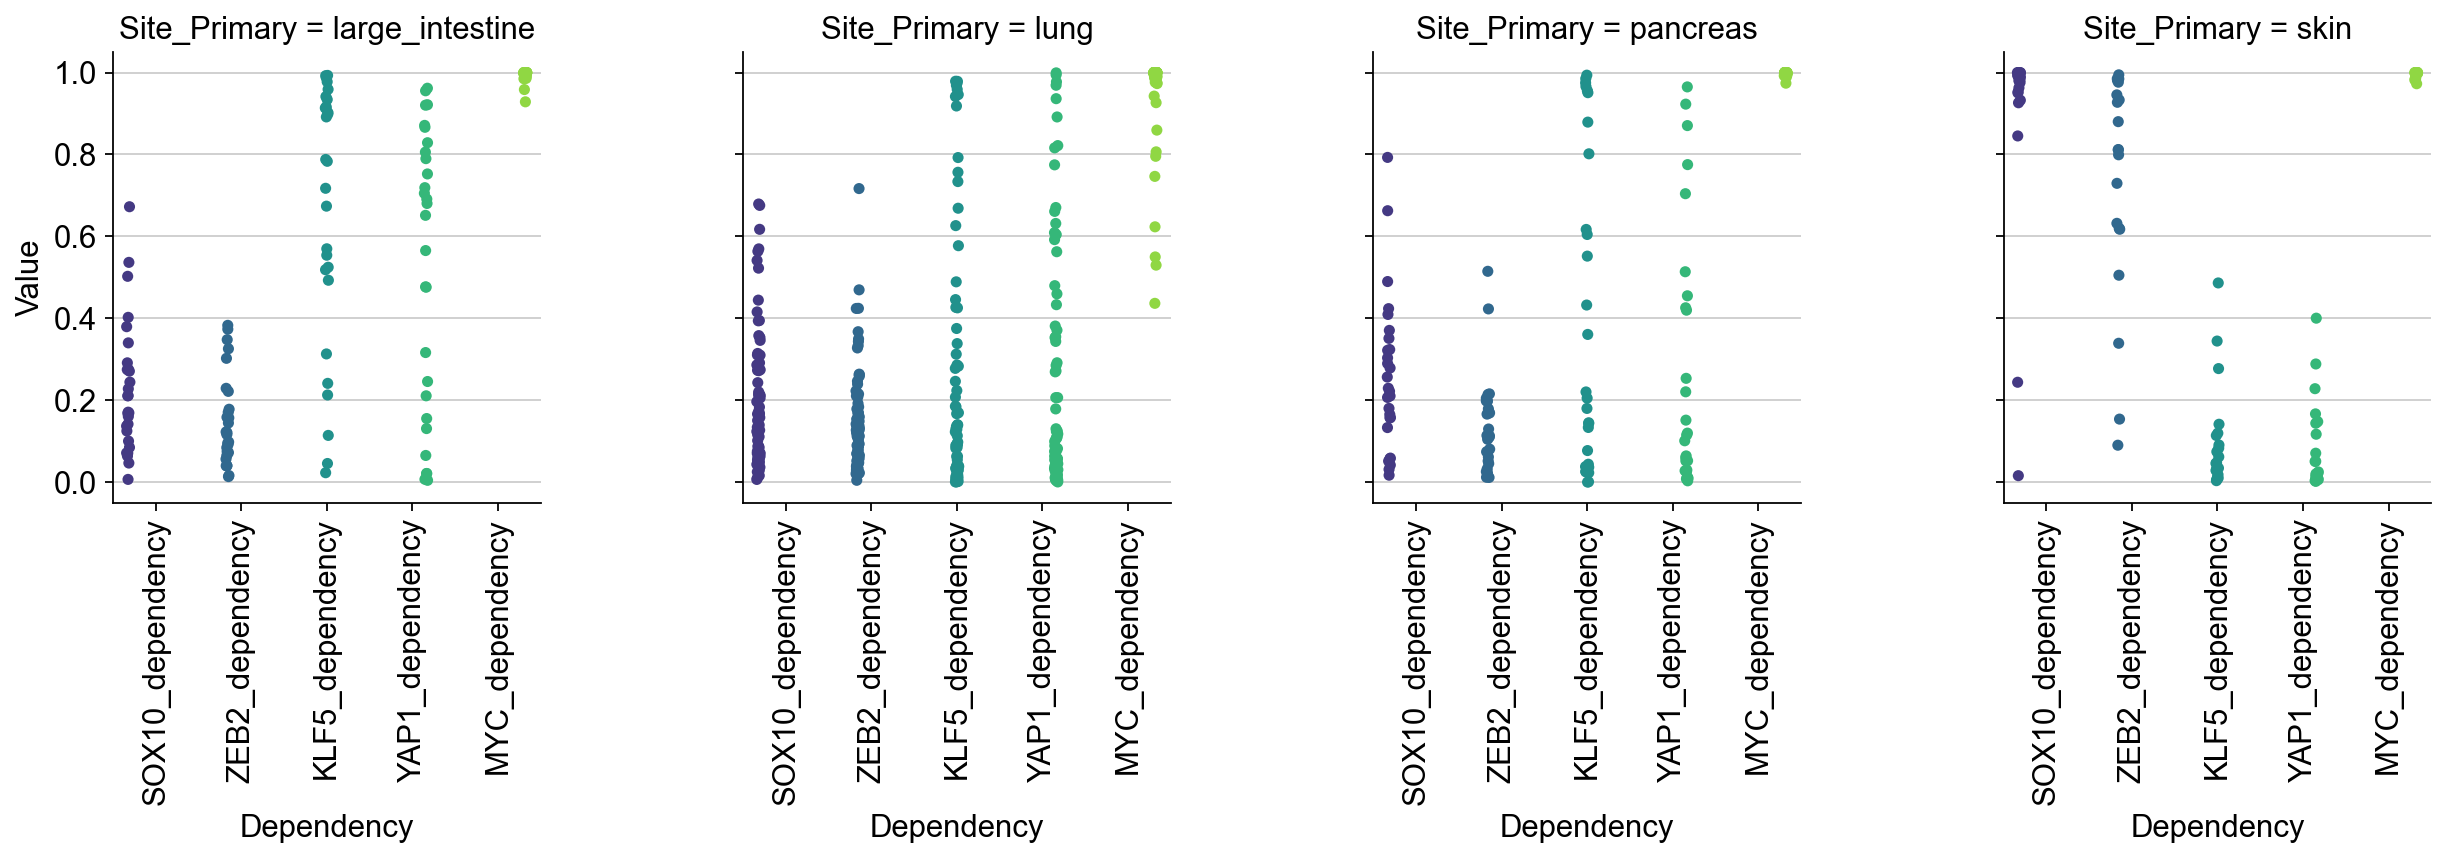

In [545]:

# Melt the DataFrame to long format suitable for sns.catplot
df_long = m4.melt(id_vars='Site_Primary', value_vars=deps, var_name='Dependency', value_name='Value')

# Create the strip plot
g = sns.catplot(
    data=df_long, 
    x='Dependency', 
    y='Value', 
    hue='Dependency', 
    col='Site_Primary', 
    kind='strip', 
    col_wrap=4,  # Adjust based on the number of 'type' categories or space available
    aspect=1,    # Aspect ratio of each subplot
    height=4,    # Height of each subplot
    dodge=True,  # Separate points by hue
    palette='viridis'  # Color palette for different dependencies
)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()

In [547]:
df_long['gene'] = df_long['Dependency'].str.split('_').str[0]
df_long

Site_Primary        Dependency     Value   gene
0                skin  SOX10_dependency       NaN  SOX10
1                skin  SOX10_dependency  0.243780  SOX10
2                skin  SOX10_dependency  0.932408  SOX10
3                lung  SOX10_dependency  0.166272  SOX10
4                lung  SOX10_dependency  0.393798  SOX10
...               ...               ...       ...    ...
1255  large_intestine    MYC_dependency  0.999961    MYC
1256         pancreas    MYC_dependency  1.000000    MYC
1257             skin    MYC_dependency  1.000000    MYC
1258             skin    MYC_dependency  0.999970    MYC
1259         pancreas    MYC_dependency  1.000000    MYC

[1260 rows x 4 columns]

In [548]:
m4['type'].value_counts()

type
lung_NSC           91
lung_small_cell    44
colorectal         42
melanoma           39
pancreas           34
liver               1
other               1
Name: count, dtype: int64

In [549]:
m4

Pathology     Site_Primary  Gender   Age  \
Cell_Line                                                        
A101D_SKIN              primary             skin    male  56.0   
A2058_SKIN           metastasis             skin    male  43.0   
A375_SKIN               primary             skin  female  54.0   
A549_LUNG               primary             lung    male  58.0   
ABC1_LUNG               primary             lung    male  47.0   
...                         ...              ...     ...   ...   
T84_LARGE_INTESTINE  metastasis  large_intestine    male  72.0   
TCCPAN2_PANCREAS        primary         pancreas  female  68.0   
WM115_SKIN              primary             skin  female  59.0   
WM2664_SKIN          metastasis             skin  female  58.0   
YAPC_PANCREAS        metastasis         pancreas    male  43.0   

                    inferred_ethnicity        type     mutRate     TACSTD2  \
Cell_Line                                                                    
A101D_SKIN                   Caucasian    melanoma   78.145129    0.311490   
A2058_SKIN                   Caucasian    melanoma  164.676892    0.106081   
A375_SKIN                    Caucasian    melanoma  150.058138    0.137521   
A549_LUNG                    Caucasian    lung_NSC  159.491753    0.111635   
ABC1_LUNG                        Asian    lung_NSC  146.934953  107.021000   
...                                ...         ...         ...         ...   
T84_LARGE_INTESTINE          Caucasian  colorectal  101.516333    8.629760   
TCCPAN2_PANCREAS                 Asian    pancreas  181.227373   28.840100   
WM115_SKIN                   Caucasian    melanoma  135.062129    0.237185   
WM2664_SKIN                  Caucasian    melanoma  123.352645    1.383270   
YAPC_PANCREAS                    Asian    pancreas  115.525406  153.285000   

                        GSDMC      CHGA  ...      GPA33       SOX10  \
Cell_Line                                ...                          
A101D_SKIN           0.013799  0.088763  ...   0.000000  109.756000   
A2058_SKIN           0.015156  0.146858  ...   0.013697  105.852000   
A375_SKIN            0.016373  0.052659  ...   0.071027  144.128000   
A549_LUNG            0.027520  0.343523  ...   0.004522    0.013126   
ABC1_LUNG            0.243177  0.049501  ...   0.033383    0.009229   
...                       ...       ...  ...        ...         ...   
T84_LARGE_INTESTINE  0.013058  0.440745  ...  96.380200    0.044742   
TCCPAN2_PANCREAS     0.000000  0.172712  ...   2.240720    0.098306   
WM115_SKIN           0.002658  0.138083  ...   0.012010  150.382000   
WM2664_SKIN          0.013869  0.223024  ...   0.056403  136.494000   
YAPC_PANCREAS        3.723760  0.148591  ...   0.045930    0.100421   

                           S100B       XIST       MYC  SOX10_dependency  \
Cell_Line                                                                 
A101D_SKIN            486.986000  17.982500   7.20015               NaN   
A2058_SKIN            141.834000   0.025915  11.87060          0.243780   
A375_SKIN              44.639000  21.443700   4.80715          0.932408   
A549_LUNG               0.018757   0.015292  41.59930          0.166272   
ABC1_LUNG               0.011539   0.016126  14.42110          0.393798   
...                          ...        ...       ...               ...   
T84_LARGE_INTESTINE     0.101396   0.020360  90.61300          0.170756   
TCCPAN2_PANCREAS        0.721637   0.093281  23.10740          0.256531   
WM115_SKIN           1281.780000   0.037131   9.92028          1.000000   
WM2664_SKIN           575.329000   0.198294  46.90810          0.984307   
YAPC_PANCREAS           0.580180   0.136149  36.62420          0.370444   

                     ZEB2_dependency  KLF5_dependency  YAP1_dependency  \
Cell_Line                                                                
A101D_SKIN                       NaN              NaN              NaN   
A2058_SKIN                

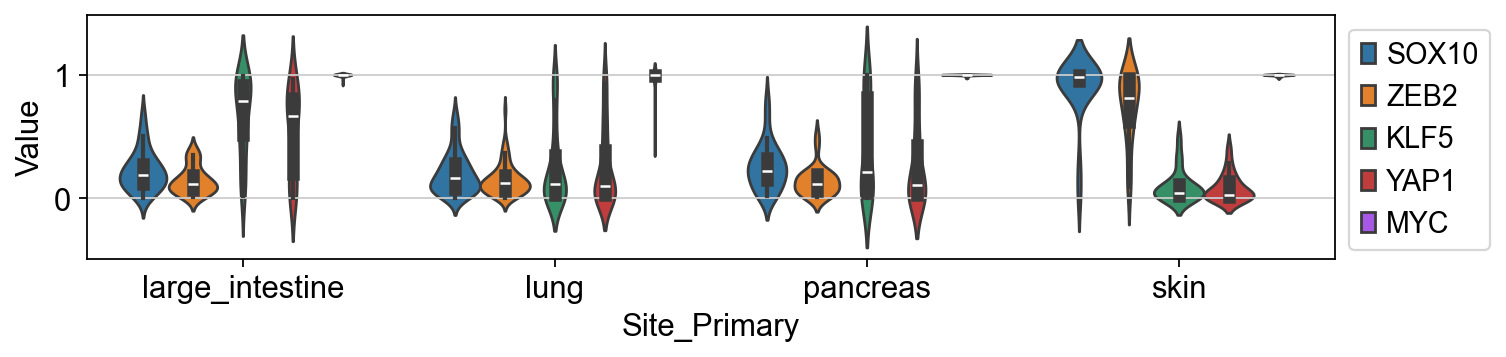

In [551]:
plt.figure(figsize=[10,2])
sns.violinplot(data=df_long, x='Site_Primary', y='Value', hue='gene')
plt.legend(bbox_to_anchor=[1,1])

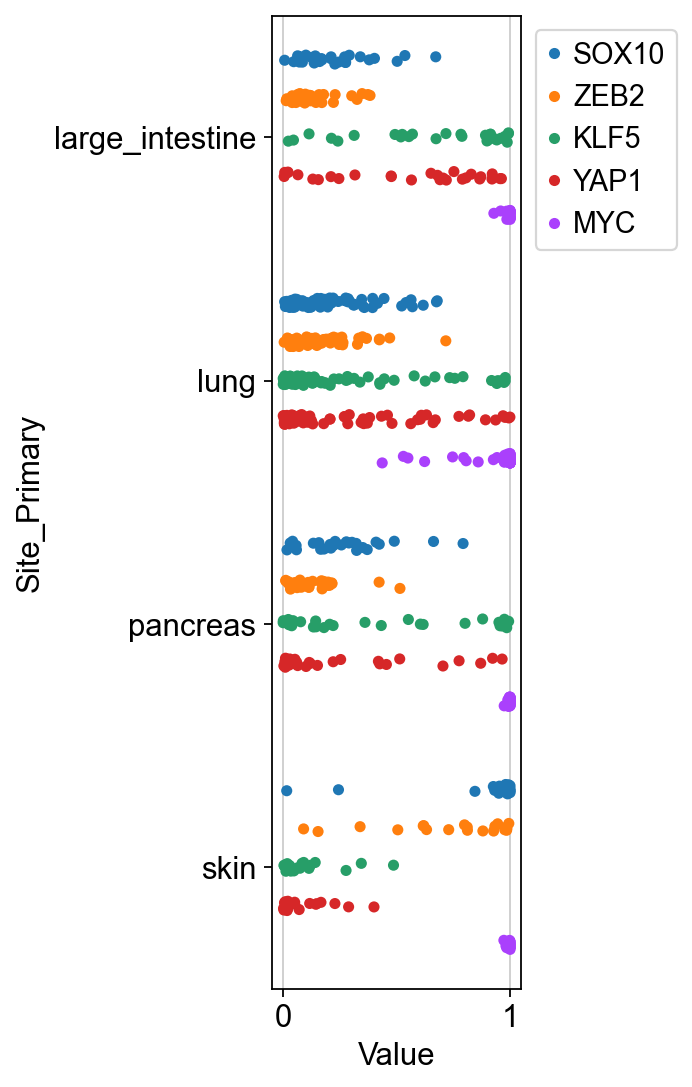

In [564]:
plt.figure(figsize=[2,8])
sns.stripplot(data=df_long, y='Site_Primary', x='Value', hue='gene', dodge=True)
plt.legend(bbox_to_anchor=[1,1])

In [553]:
m4.to_csv('data/CCLE_tiny.csv.gz', compression='gzip')